# Forest Fire Prediction - First Semester 2021
###  Prepared by Khubim Kumar Chhetri (D00251757)
##### Cross Module Project with Programming, Statistics & Research

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os,sys
import statistics
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv')
df

Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC   ISI BUI  FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6  1.3 3.4  0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6  1   3.9  0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1  0.3 2.7  0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9  0   1.7  0              not fire   
...                                                                                    ...
26  09    2012 30          65  14  0     85.4 16  44.5 4.5 16.9 6.5                fire   
27  09    2012 28          87  15  4.4   41.1 6.5 8    0.1 6.2  0              not fire   
28  09    2012 27          87  29  0.5   45.9 3.5 7.9  0.4 3.4  0.2            not fire   
29  09    2012 24          54  18  0.1   79.7 4.3 15.2 1.7 5.1  0.7            not fire   
30  09    2012 24          64  15  0.2   67.3 3.8 16.5 1.2 4.8  0.5           not fire    

[247 rows x 1 columns]

<b>
Here we can see data is not given in proper format.

As per the dataset information, The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

So we wil divide the dataset based on two region, and concate in a single dataframe

In [3]:
# Bejaia Region Dataset 
df_br=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_br=df_br.loc[:121,:]
df_br['Region']='BR'
df_br

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
117  26    09  2012          31  54  11     0    82    6  16.3  2.5  6.2  1.7   
118  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
119  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   

       Classes   Region  
0    not fire        BR  
1    not fire        BR  
2    not fire        BR  
3    not fire        BR  
4    not fire        BR  
..           ...    ...  
117  not fire        BR  
118      fire        BR  
119  not fire        BR  
120  not fire        BR  
121  not fire        BR  

[122 rows x 15 columns]

In [4]:
# Sidi-Bel Abbes Region Dataset

df_sbar=pd.read_csv('https://raw.githubusercontent.com/khubim/Stat_Project/main/Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_sbar=df_sbar.loc[124:, :]
df_sbar['Region']='SBAR'
df_sbar

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
124  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   2.8   
125  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   2.9   
126  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   2.6   
127  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2   5.6   
128  05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8   6.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes   Region  
124  0.2   not fire      SBAR  
125  0.2   not fire      SBAR  
126  0.1   not fire      SBAR  
127    1   not fire      SBAR  
128  0.9   not fire      SBAR  
..   ...           ...    ...  
241  6.5       fire      SBAR  
242    0   not fire      SBAR  
243  0.2   not fire      SBAR  
244  0.7   not fire      SBAR  
245  0.5  not fire       SBAR  

[122 rows x 15 columns]

In [5]:
data=pd.concat([df_br, df_sbar], axis=0, ignore_index=True)
data

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes   Region  
0    0.5   not fire        BR  
1    0.4   not fire        BR  
2    0.1   not fire        BR  
3      0   not fire        BR  
4    0.5   not fire        BR  
..   ...           ...    ...  
239  6.5       fire      SBAR  
240    0   not fire      SBAR  
241  0.2   not fire      SBAR  
242  0.7   not fire      SBAR  
243  0.5  not fire       SBAR  

[244 rows x 15 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


<b>Looks like all the features are identified as object but can be converted into numeric, if we remove rows which has strings.

In [7]:
data.describe()

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   244   244   244         244  244  244   244   244  244  244  244  244   
unique   31     4     1          19   62   18    39   173  166  198  106  174   
top      01    07  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes   Region  
count   244       243    244  
unique  127         8      2  
top     0.4   fire        BR  
freq     12       131    122

In [8]:
# Columns which has null values
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [9]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

<b>'Classes ' column name has extra spaces, we will remove the space

In [10]:
updated_column=data.columns.str.rstrip()
updated_column=updated_column.str.lstrip()
data.columns=updated_column

In [11]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [13]:
data['Classes']=data['Classes'].str.rstrip()

In [14]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [15]:
data[data['Classes'].isnull()]

day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes Region  
165  fire        NaN   SBAR

<b>We will drop the row having null because data in DC and FWI are not proper

In [16]:
data=data.dropna()

# Saving dataset for analysis

In [17]:
data.to_csv('forest_fire_dataset_processed.csv', header=True, index=None)

# Import Updated and processed dataset

In [18]:
dataset=pd.read_csv('forest_fire_dataset_processed.csv')
dataset.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes Region  
0  0.5  not fire     BR  
1  0.4  not fire     BR  
2  0.1  not fire     BR  
3  0.0  not fire     BR  
4  0.5  not fire     BR

In [19]:
dataset.tail()

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI   Classes Region  
238  6.5      fire   SBAR  
239  0.0  not fire   SBAR  
240  0.2  not fire   SBAR  
241  0.7  not fire   SBAR  
242  0.5  not fire   SBAR

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


<b>Describe Variables<b>
    

day = continuous numeric  - (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
    
month = continuous numeric - (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)Weather data observations

year = continuous numeric - (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)Weather data observations

Temperature =continuous numeric   - temperature noon (temperature max) in Celsius degrees: 22 to 42

RH = continuous numeric - Relative Humidity in %: 21 to 90
    
WS = continuous numeric - Wind speed in km/h: 6 to 29,

Rain = categorical , norminal - total day in mm: 0 to 16.8,

FFMC = categorical , norminal - Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

DMC = categorical , norminal - Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

DC = continuous numeric - Drought Code (DC) index from the FWI system: 7 to 220.4

ISI = categorical , norminal - Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

BUI = categorical , norminal - Buildup Index (BUI) index from the FWI system: 1.1 to 68
    
FWI = categorical , norminal - Fire Weather Index (FWI) Index: 0 to 31.1

Region = categorical , nominal - two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
    
Classes= Categorical , nominal - two classes, namely Fire and not Fire

In [21]:
dataset.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [22]:
dataset.describe()

day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606    4.154234   14.228421   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   71.850000    5.800000   12.350000    1.400000    6.000000   
50%      0.000000   83.300000   11.300000   33.100000    3.500000   12.400000   
75%      0.500000   88.300000   20.800000   69.100000    7.250000   22.650000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI  
count  243.000000  
mean     7.035391  
std      7.440568  
min      0.000000  
25%      0.700000  
50%      4.200000  
75%     11.450000  
max     31.100000

In [23]:
for column in dataset:
    print(column, len(dataset[column].unique()))

day 31
month 4
year 1
Temperature 19
RH 62
Ws 18
Rain 39
FFMC 173
DMC 165
DC 197
ISI 106
BUI 173
FWI 125
Classes 2
Region 2


<b>1-Adding a new column 'day_name' using 'day', 'month', 'year' column
    
<b>2-Converting the 'month' column to exact name  of the month

In [24]:
dataset['day_name']=pd.to_datetime(dataset[['day', 'month', 'year']]).apply(lambda x: x.strftime("%a"))
dataset['month']=pd.to_datetime(dataset[['day', 'month', 'year']]).apply(lambda x: x.strftime("%b"))

In [25]:
dataset.head()

day month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1   Jun  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2   Jun  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3   Jun  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4   Jun  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5   Jun  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

    Classes Region day_name  
0  not fire     BR      Fri  
1  not fire     BR      Sat  
2  not fire     BR      Sun  
3  not fire     BR      Mon  
4  not fire     BR      Tue

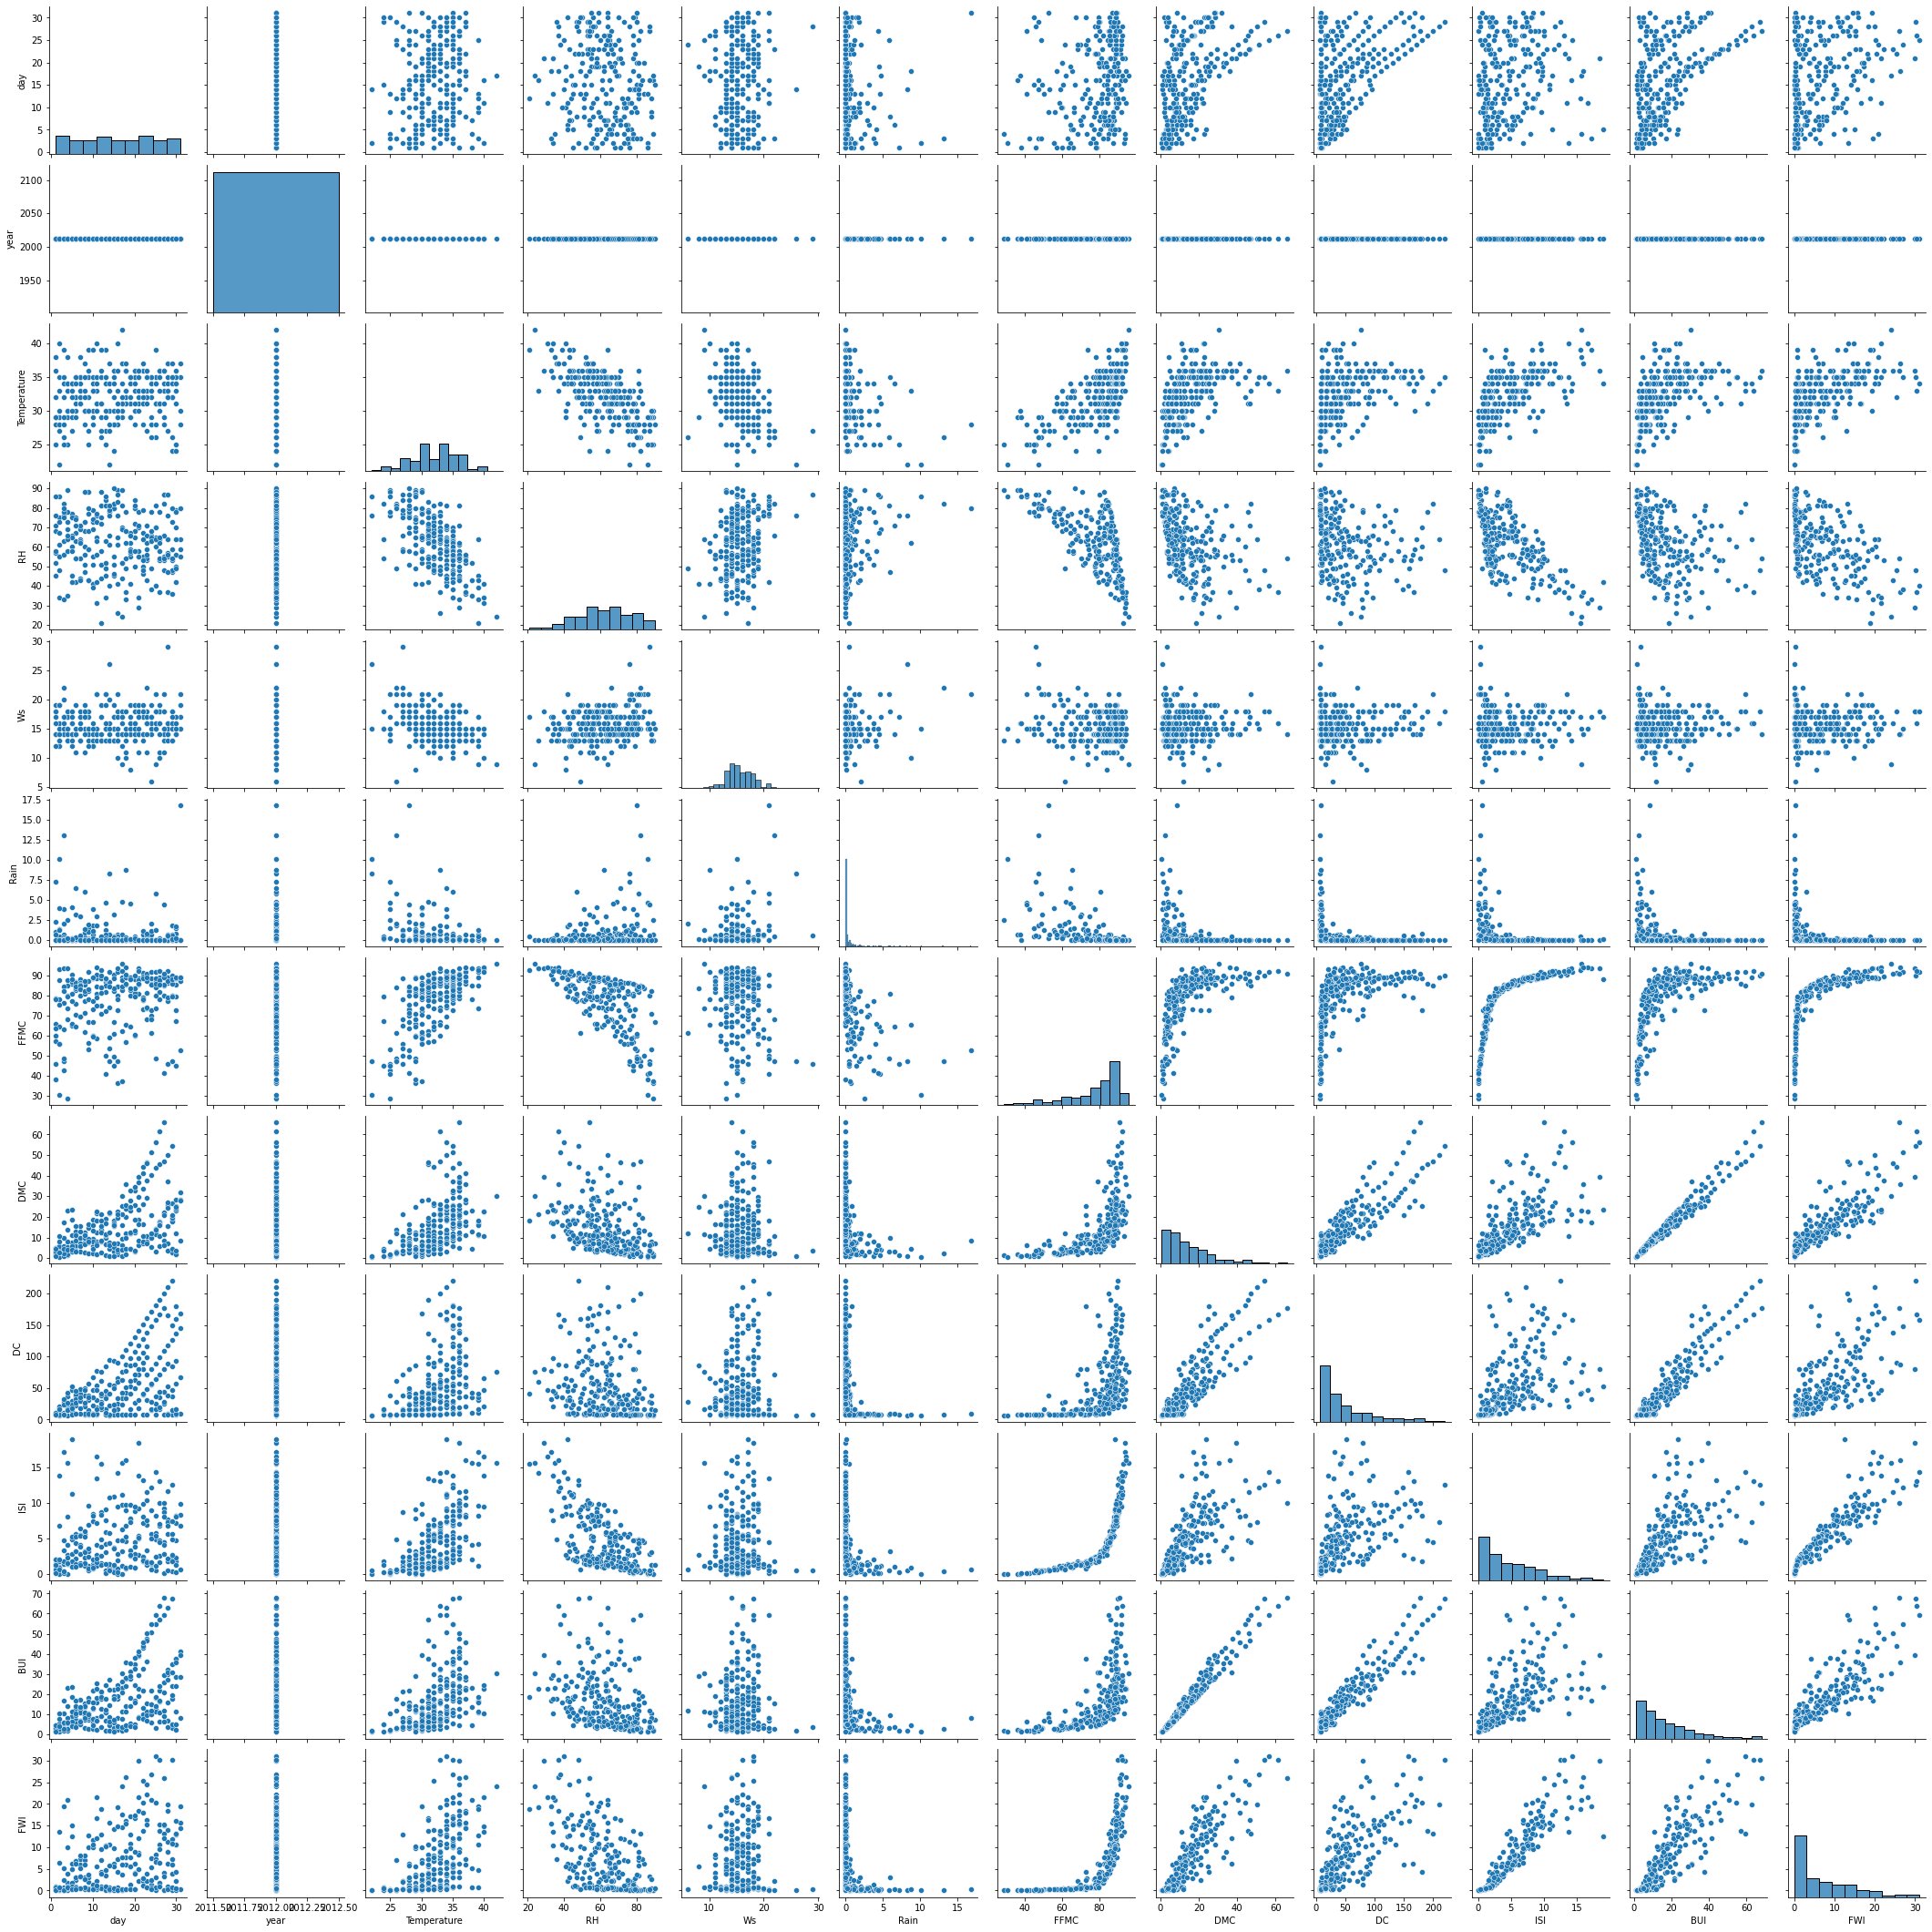

In [26]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='Classes', ylabel='count'>

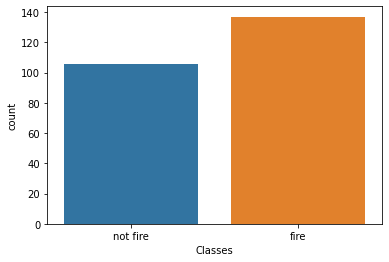

In [27]:
sns.countplot(x=dataset['Classes'])

<AxesSubplot:xlabel='Region', ylabel='count'>

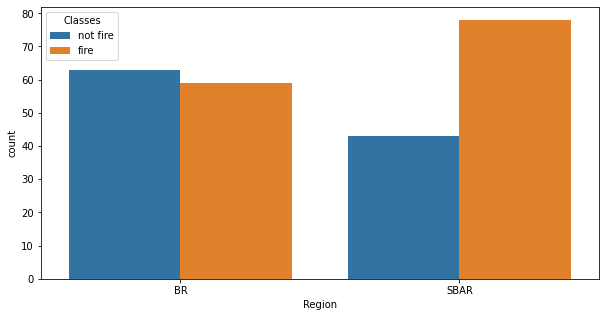

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['Region'], hue=dataset['Classes'])

<Figure size 720x360 with 0 Axes>

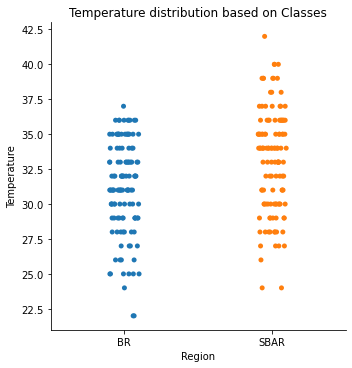

<Figure size 720x360 with 0 Axes>

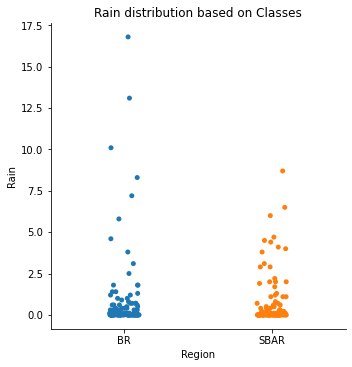

<Figure size 720x360 with 0 Axes>

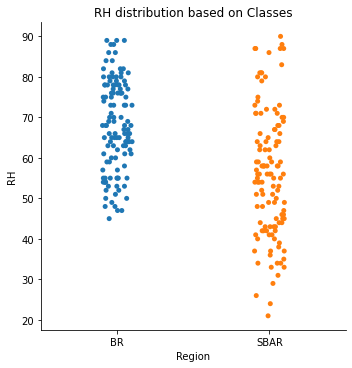

<Figure size 720x360 with 0 Axes>

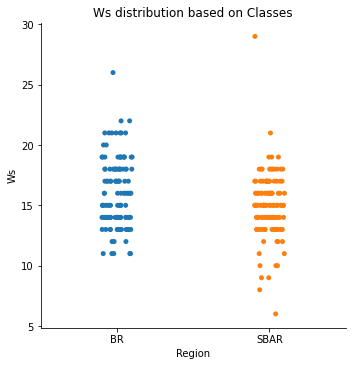

<Figure size 720x360 with 0 Axes>

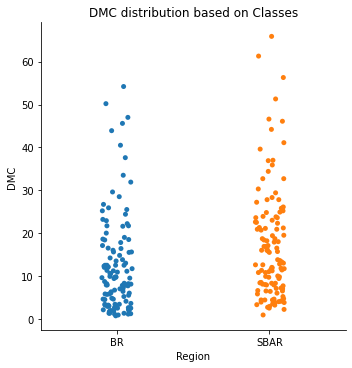

In [29]:
for column in ['Temperature', 'Rain', 'RH', 'Ws','DMC']:
    plt.figure(figsize=(10,5))
    sns.catplot(data=dataset, x='Region', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

<b>Count of fire is high in Sidi-Bel Abbes Region, because Temperature of this region remains high and rainfall is less

<AxesSubplot:xlabel='month', ylabel='count'>

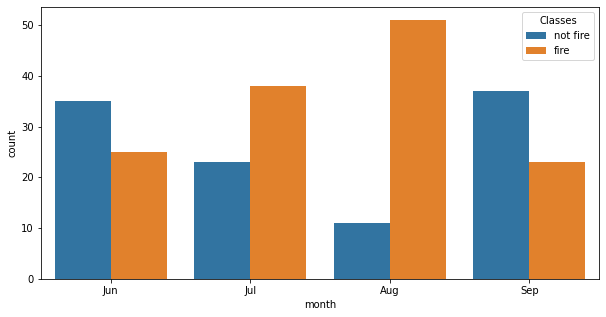

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['month'], hue=dataset['Classes'], order=['Jun', 'Jul', 'Aug', 'Sep'])

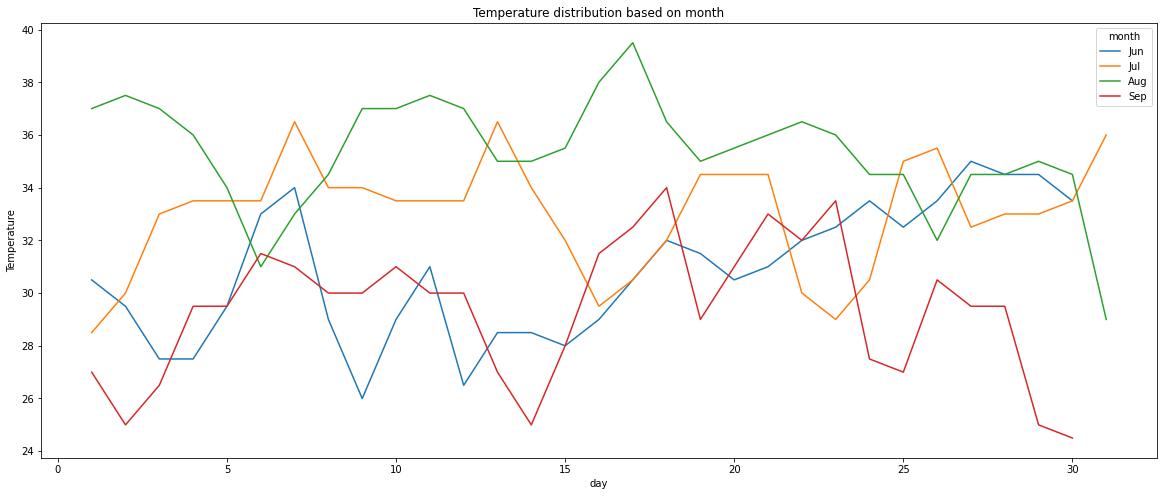

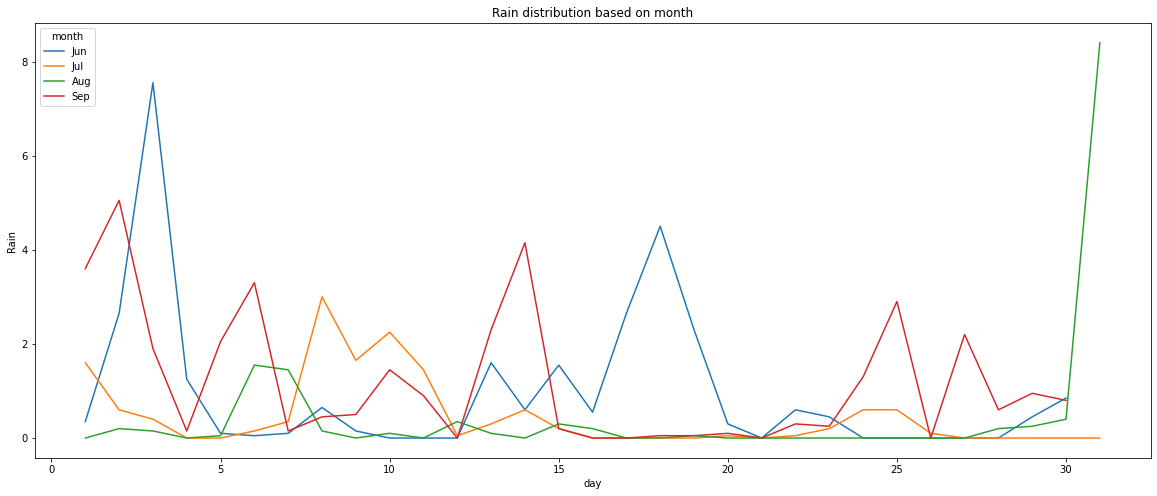

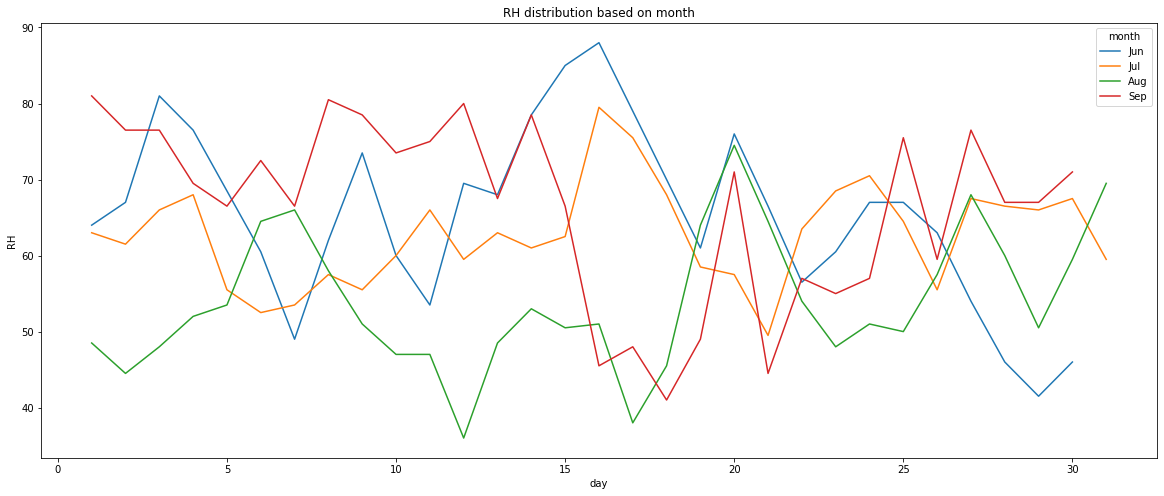

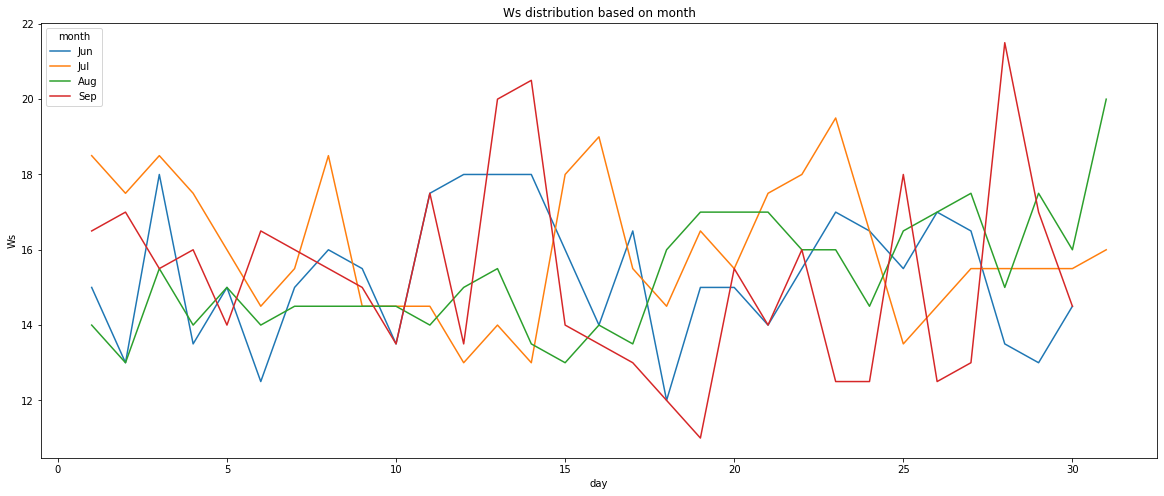

In [31]:
for column in ['Temperature', 'Rain', 'RH', 'Ws']:
    plt.figure(figsize=(20,8))
    sns.lineplot(x=dataset['day'], y=dataset[column], hue=dataset['month'], ci=None, hue_order=['Jun', 'Jul', 'Aug', 'Sep'])
    plt.title(f'{column} distribution based on month')
    plt.show()

<b>From the above analysis we can see that maximum fire was happend in August month, because of the high temperature and low rai

<AxesSubplot:xlabel='day_name', ylabel='count'>

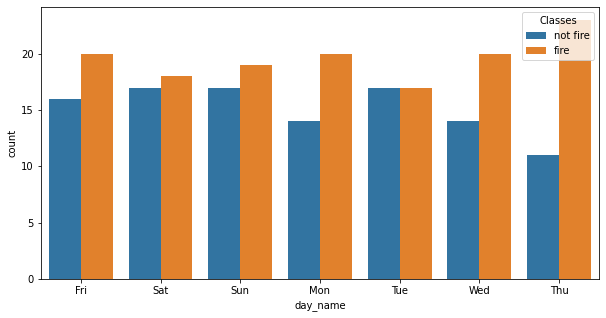

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset['day_name'], hue=dataset['Classes'])

Text(0.5, 1.0, 'Fire based on month and Region')

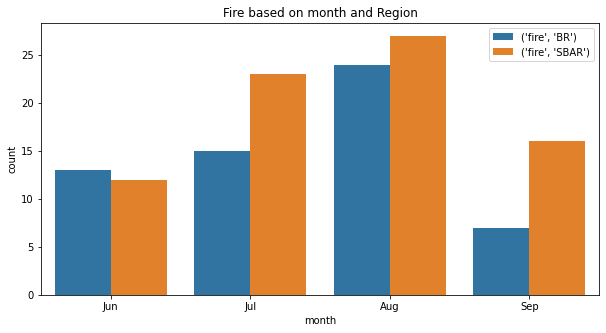

In [33]:
plt.figure(figsize=(10,5))
fire=dataset[dataset['Classes']=='fire']
sns.countplot(x=fire['month'], order=['Jun', 'Jul', 'Aug', 'Sep'], hue=fire[['Classes', 'Region']].apply(tuple, axis=1))
plt.title('Fire based on month and Region')

Text(0.5, 1.0, 'Fire based on day')

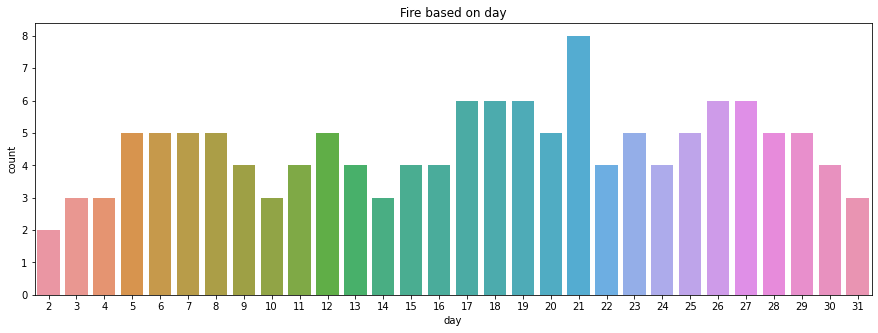

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x=dataset[dataset['Classes']=='fire']['day'])
plt.title("Fire based on day")

<Figure size 720x360 with 0 Axes>

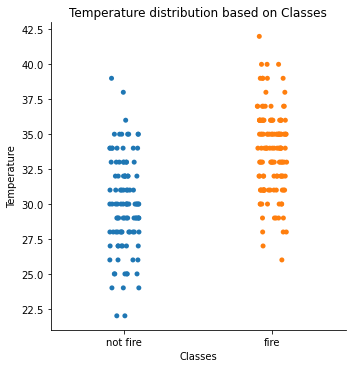

<Figure size 720x360 with 0 Axes>

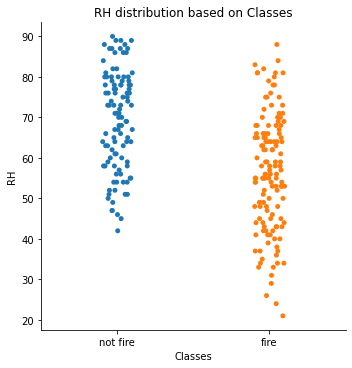

<Figure size 720x360 with 0 Axes>

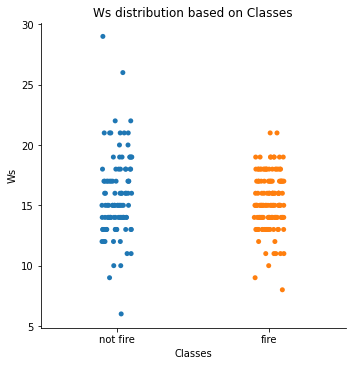

<Figure size 720x360 with 0 Axes>

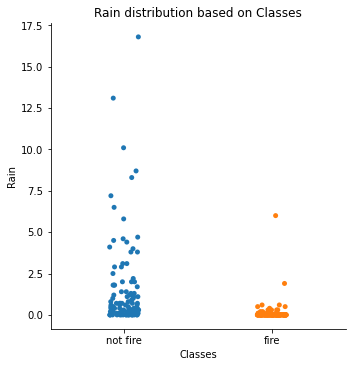

<Figure size 720x360 with 0 Axes>

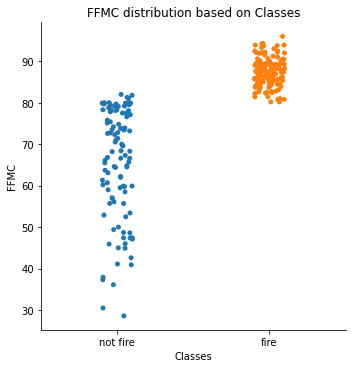

<Figure size 720x360 with 0 Axes>

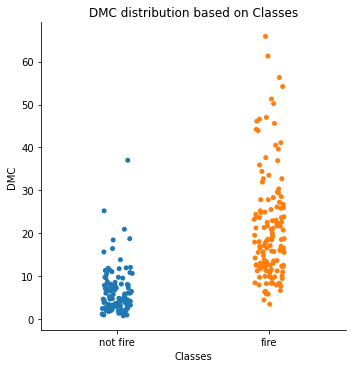

<Figure size 720x360 with 0 Axes>

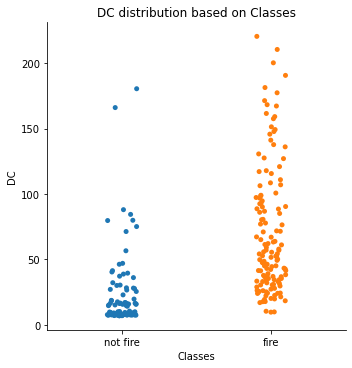

<Figure size 720x360 with 0 Axes>

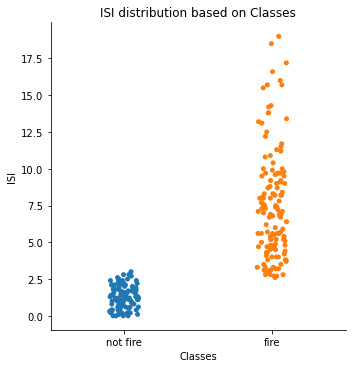

<Figure size 720x360 with 0 Axes>

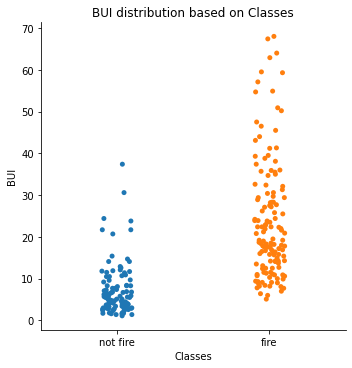

<Figure size 720x360 with 0 Axes>

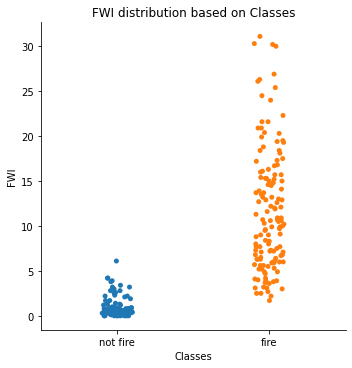

In [35]:
for column in dataset.drop(columns=['day', 'month', 'year', 'day_name', 'Region', 'Classes']):
    plt.figure(figsize=(10,5))
    sns.catplot(data=dataset, x='Classes', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

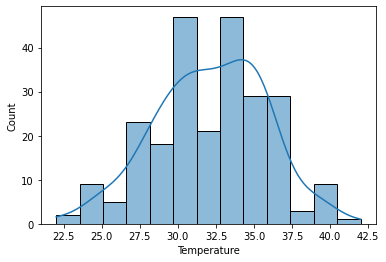

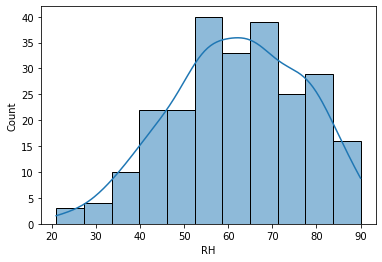

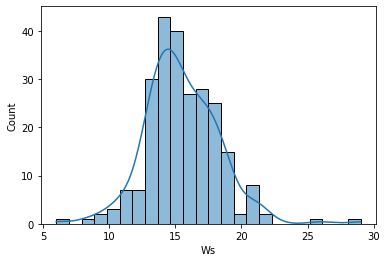

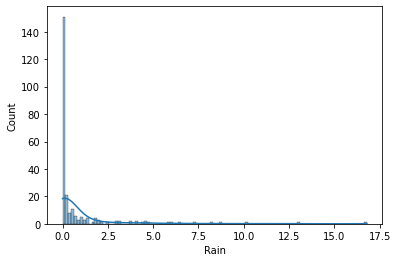

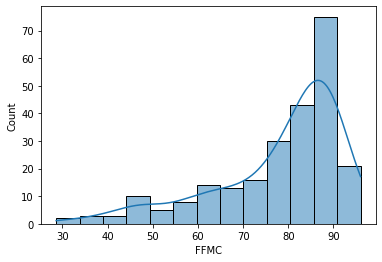

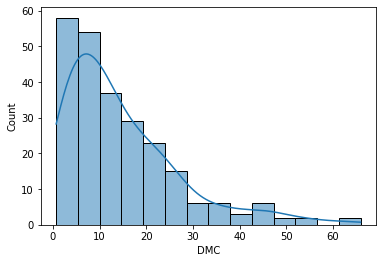

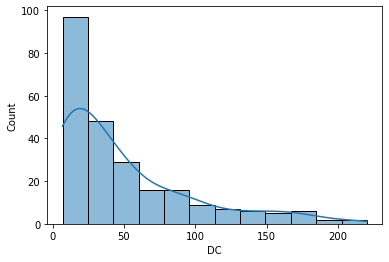

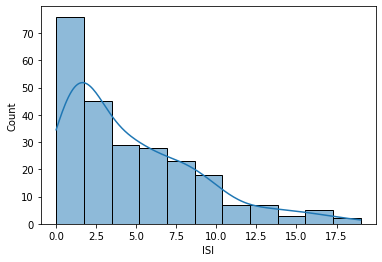

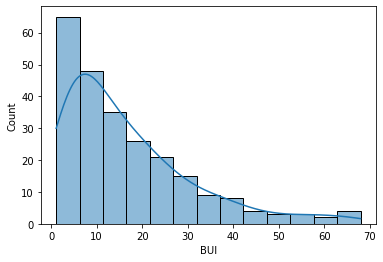

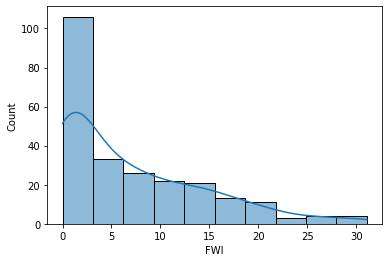

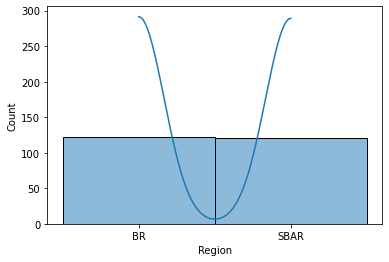

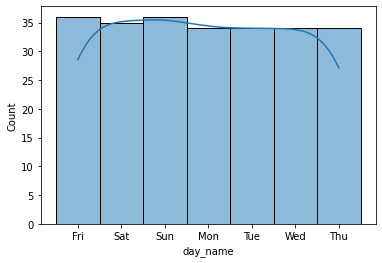

In [36]:
for column in dataset.drop(columns=['Classes', 'year', 'month', 'day']):
    sns.histplot(dataset[column], kde=True)
    plt.show()

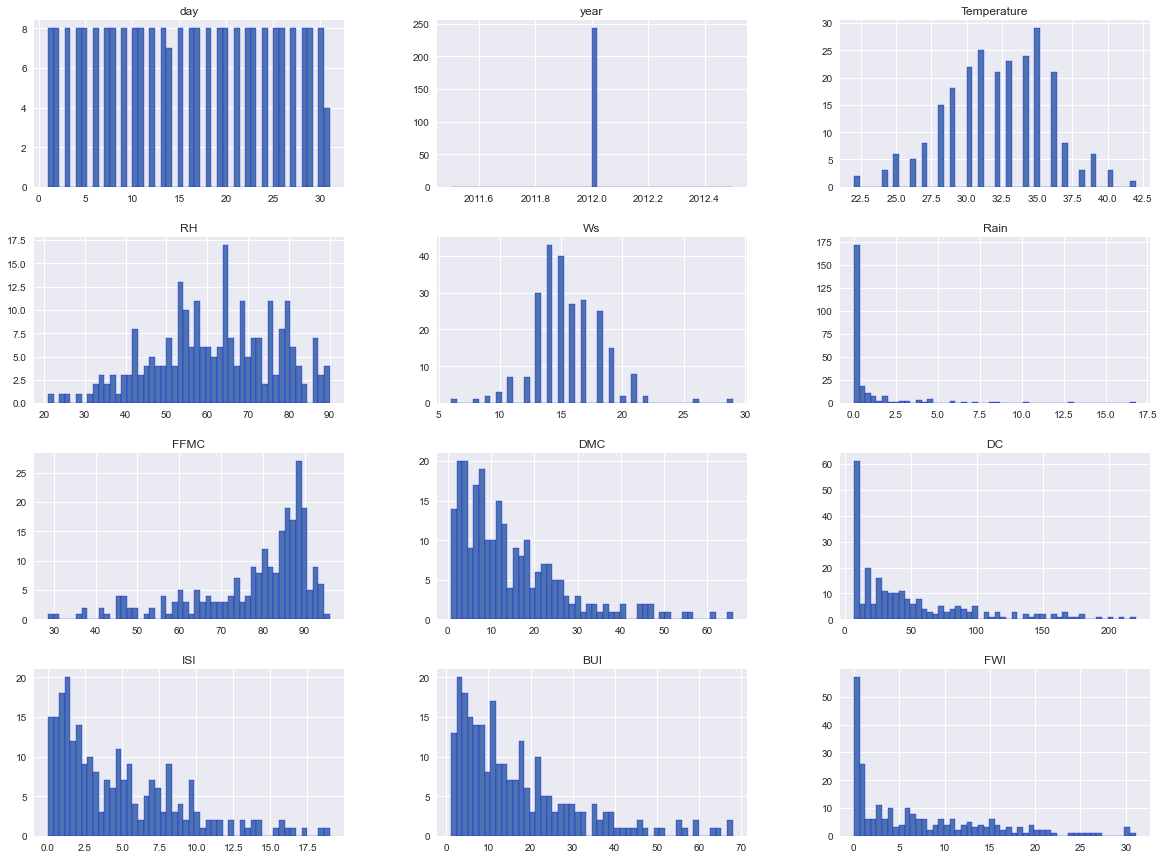

In [37]:
# PLot density plot for all features
plt.style.use('seaborn')
dataset.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [38]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'day_name'],
      dtype='object')

In [39]:
# Percentage for PieChart
percentage = dataset.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

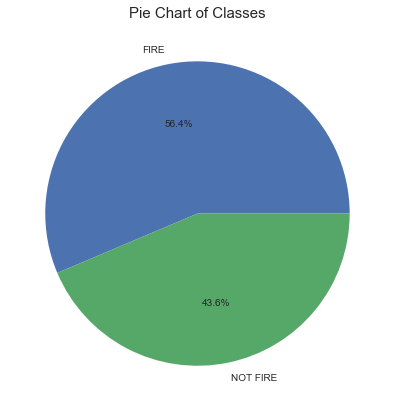

In [40]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

<b>Dropping year and day column because they have no contribution

In [41]:
final_df=dataset.drop(columns=['year', 'day'])

In [42]:
final_df.head()

month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI   Classes  \
0   Jun           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire   
1   Jun           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire   
2   Jun           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire   
3   Jun           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire   
4   Jun           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire   

  Region day_name  
0     BR      Fri  
1     BR      Sat  
2     BR      Sun  
3     BR      Mon  
4     BR      Tue

In [43]:
# Percentage for PieChart
percentage = final_df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

In [44]:
# Check counts
final_df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

<AxesSubplot:>

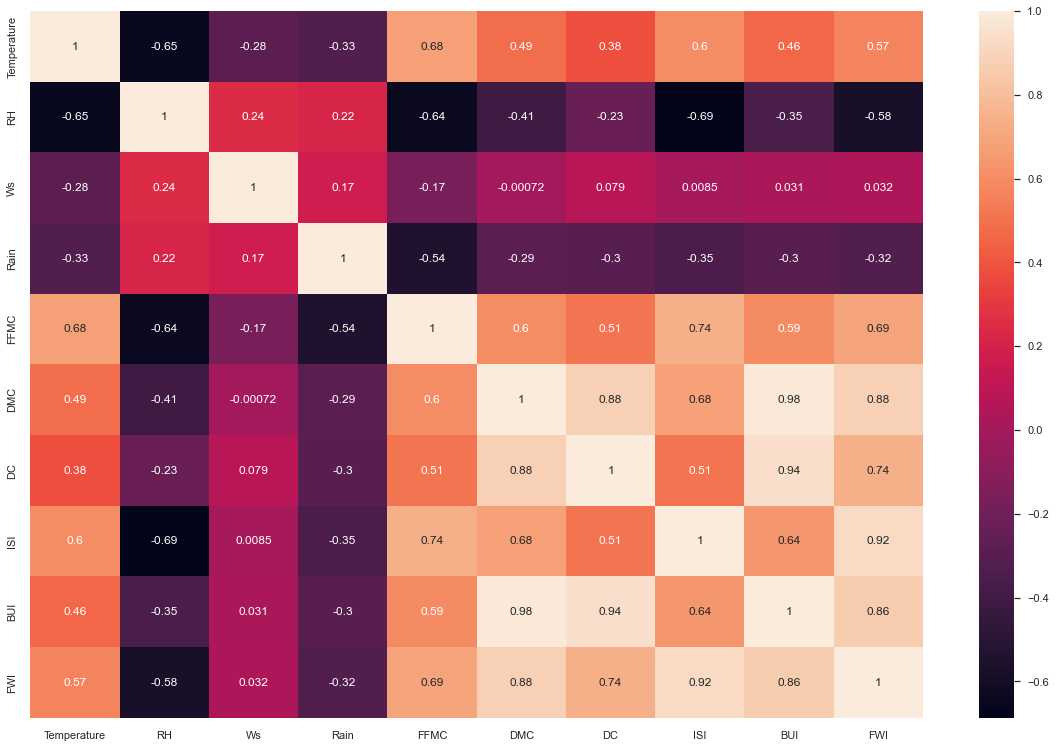

In [45]:
plt.figure(figsize=(20,13))
sns.set(font_scale=1)
sns.heatmap(final_df.corr(), annot=True)

We can see there is high correlation between BUI & DMC(0.98), BUI & DC(0.94), ISI & FWI(0.92)



<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>The pearson & Kendall method to determine the relation between the vriables </b><br><br><b>And the predictors of the cause<br><br></div>

In [46]:
final_df.corr(method ='pearson')

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651400 -0.284510 -0.326492  0.676568  0.485687   
RH             -0.651400  1.000000  0.244048  0.222356 -0.644873 -0.408519   
Ws             -0.284510  0.244048  1.000000  0.171506 -0.166548 -0.000721   
Rain           -0.326492  0.222356  0.171506  1.000000 -0.543906 -0.288773   
FFMC            0.676568 -0.644873 -0.166548 -0.543906  1.000000  0.603608   
DMC             0.485687 -0.408519 -0.000721 -0.288773  0.603608  1.000000   
DC              0.376284 -0.226941  0.079135 -0.298023  0.507397  0.875925   
ISI             0.603871 -0.686667  0.008532 -0.347484  0.740007  0.680454   
BUI             0.459789 -0.353841  0.031438 -0.299852  0.592011  0.982248   
FWI             0.566670 -0.580957  0.032368 -0.324422  0.691132  0.875864   

                   DC       ISI       BUI       FWI  
Temperature  0.376284  0.603871  0.459789  0.566670  
RH          -0.226941 -0.686667 -0.353841 -0.580957  
Ws           0.079135  0.008532  0.031438  0.032368  
Rain        -0.298023 -0.347484 -0.299852 -0.324422  
FFMC         0.507397  0.740007  0.592011  0.691132  
DMC          0.875925  0.680454  0.982248  0.875864  
DC           1.000000  0.508643  0.941988  0.739521  
ISI          0.508643  1.000000  0.644093  0.922895  
BUI          0.941988  0.644093  1.000000  0.857973  
FWI          0.739521  0.922895  0.857973  1.000000

In [47]:
final_df.corr(method='kendall')

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.490187 -0.166976 -0.224806  0.504952  0.442296   
RH             -0.490187  1.000000  0.146298  0.133190 -0.509483 -0.358086   
Ws             -0.166976  0.146298  1.000000  0.008566 -0.045913 -0.001411   
Rain           -0.224806  0.133190  0.008566  1.000000 -0.579538 -0.423570   
FFMC            0.504952 -0.509483 -0.045913 -0.579538  1.000000  0.629849   
DMC             0.442296 -0.358086 -0.001411 -0.423570  0.629849  1.000000   
DC              0.365785 -0.239147  0.045235 -0.466002  0.551945  0.712468   
ISI             0.492859 -0.486094  0.024093 -0.580013  0.922949  0.630293   
BUI             0.420667 -0.327512  0.018266 -0.436954  0.616994  0.914914   
FWI             0.491996 -0.437764  0.026744 -0.562756  0.855672  0.753846   

                   DC       ISI       BUI       FWI  
Temperature  0.365785  0.492859  0.420667  0.491996  
RH          -0.239147 -0.486094 -0.327512 -0.437764  
Ws           0.045235  0.024093  0.018266  0.026744  
Rain        -0.466002 -0.580013 -0.436954 -0.562756  
FFMC         0.551945  0.922949  0.616994  0.855672  
DMC          0.712468  0.630293  0.914914  0.753846  
DC           1.000000  0.561814  0.797238  0.669061  
ISI          0.561814  1.000000  0.620173  0.875291  
BUI          0.797238  0.620173  1.000000  0.749781  
FWI          0.669061  0.875291  0.749781  1.000000

<b>Canadian Forest Fire Weather Index (FWI) System
    
This column can be considered for Regression problem

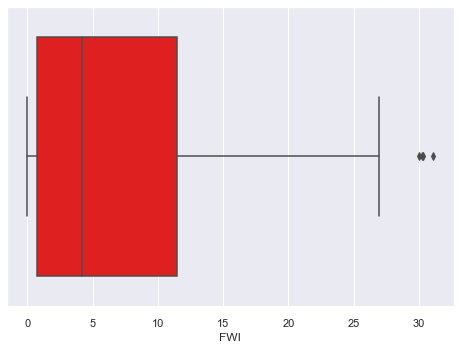

In [48]:
#Boxplot
ax = sns.boxplot(final_df['FWI'], color= 'red')

### Monthwise Fire Analysis

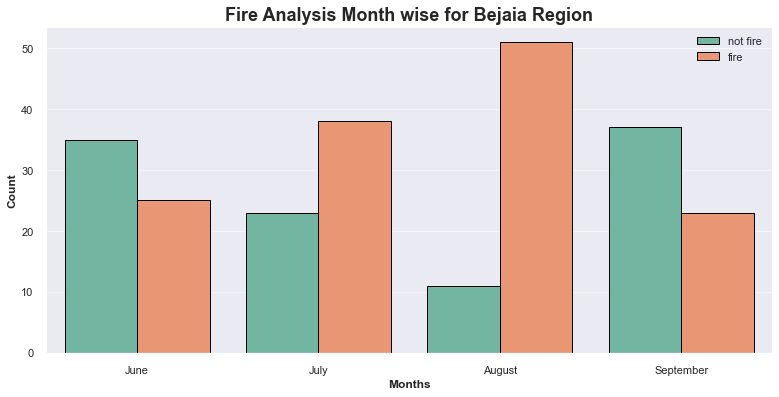

In [49]:
dftemp= final_df.loc[final_df['Region']== 'BR']
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= final_df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

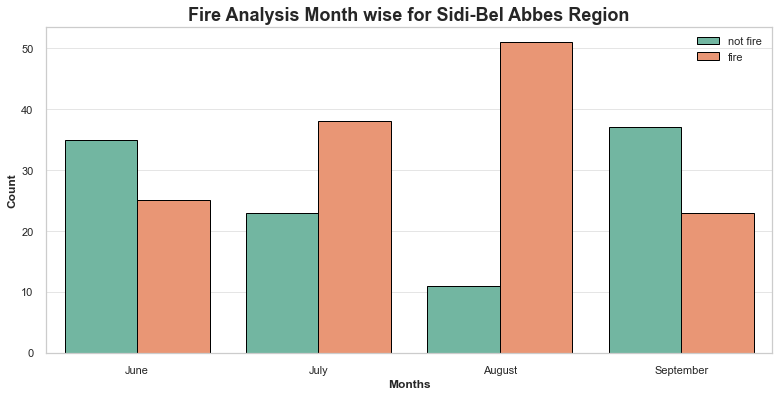

In [50]:
dftemp= final_df.loc[final_df['Region']== 'SBAR']
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= final_df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

<b>Its observed that July and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

<b>Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

<b>Less Fires was on September

In [51]:
final_df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'day_name'],
      dtype='object')

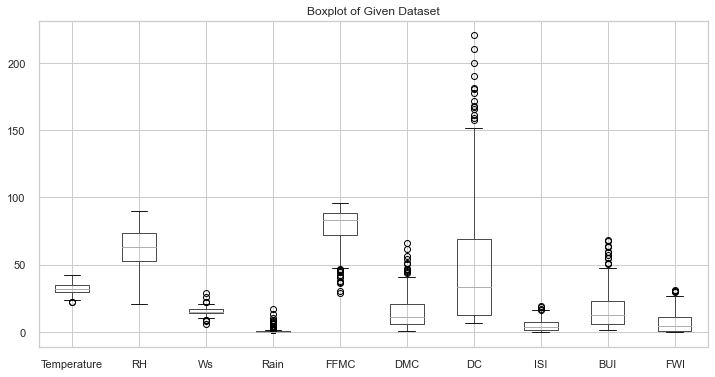

In [52]:
dftemp = final_df.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

In [53]:
# Encoding Not fire as 0 and Fire as 1
final_df['Classes']= np.where(final_df['Classes']== 'not fire',0,1)

In [54]:
# Check counts
final_df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

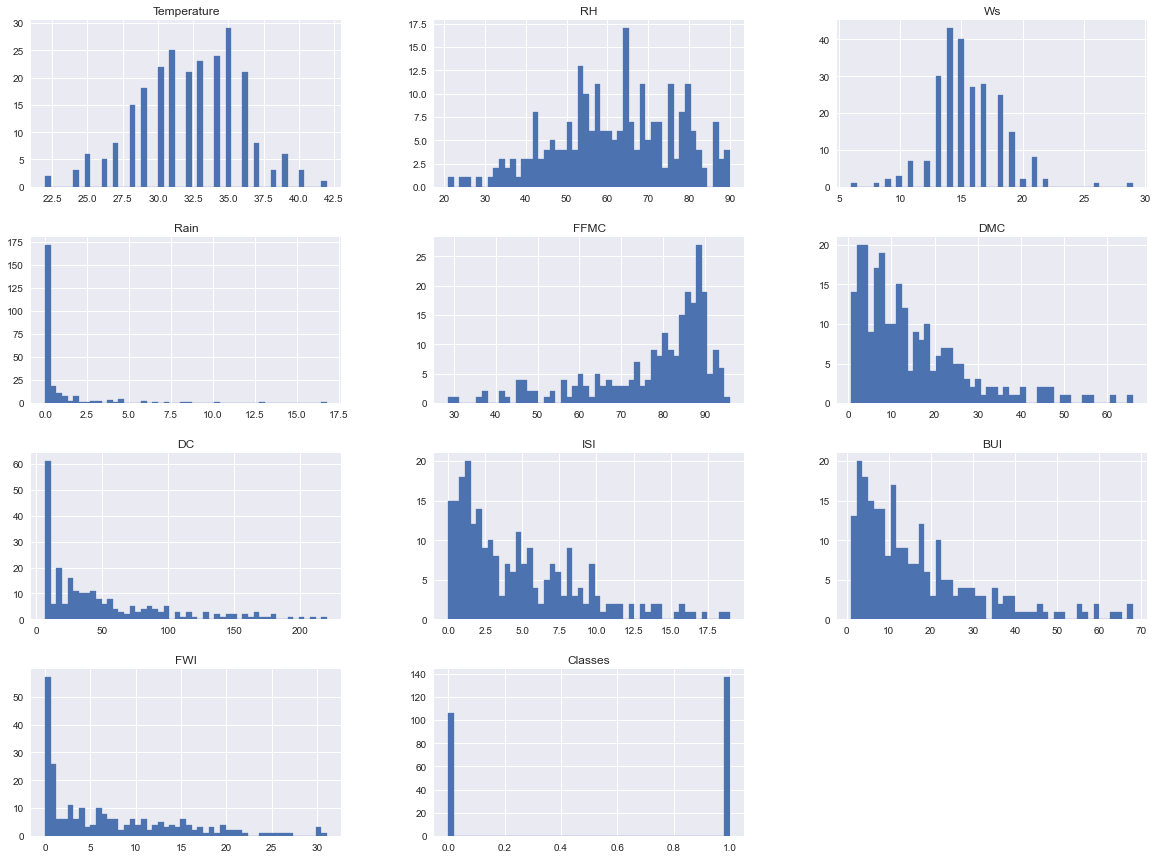

In [55]:
# PLot density plot for all features
plt.style.use('seaborn')
final_df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [56]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  final_df.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

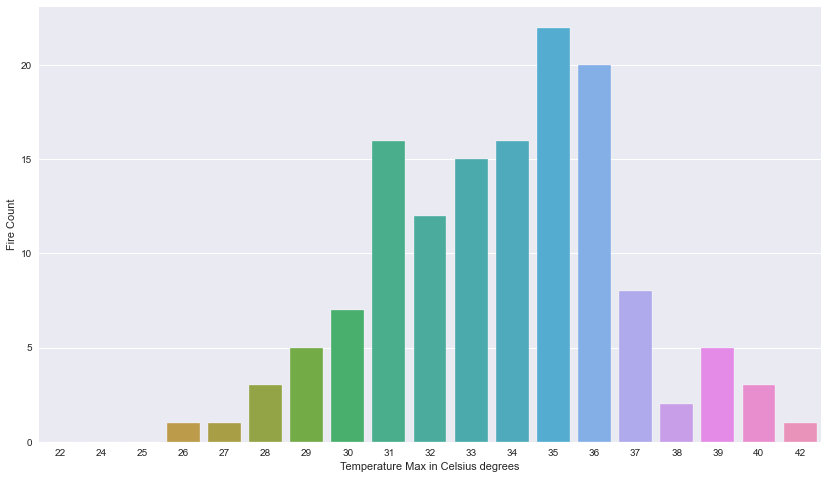

In [57]:
barchart('Temperature','Temperature Max in Celsius degrees')

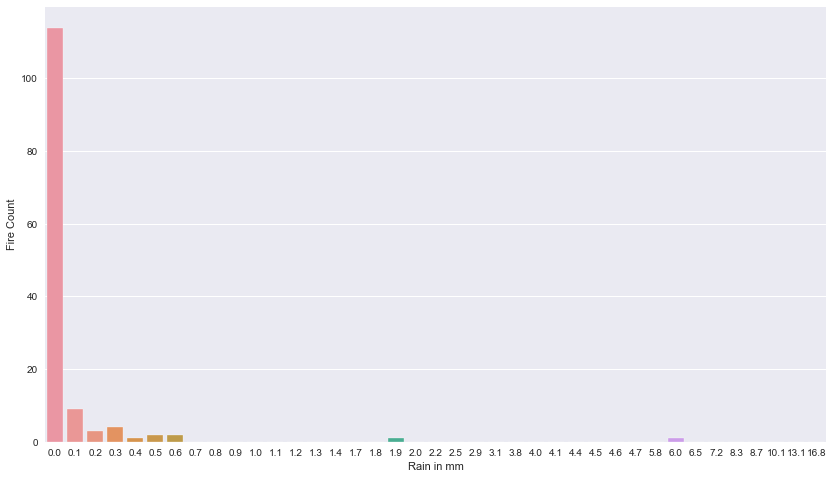

In [58]:
barchart('Rain', 'Rain in mm')

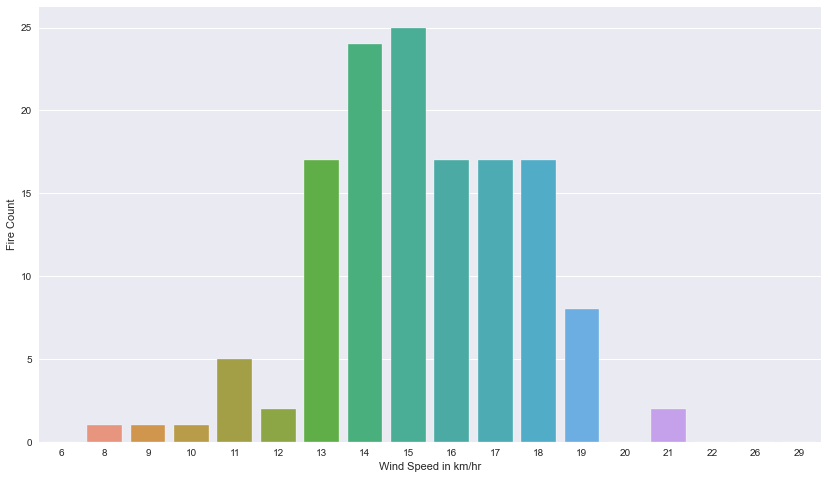

In [59]:
barchart('Ws', 'Wind Speed in km/hr')

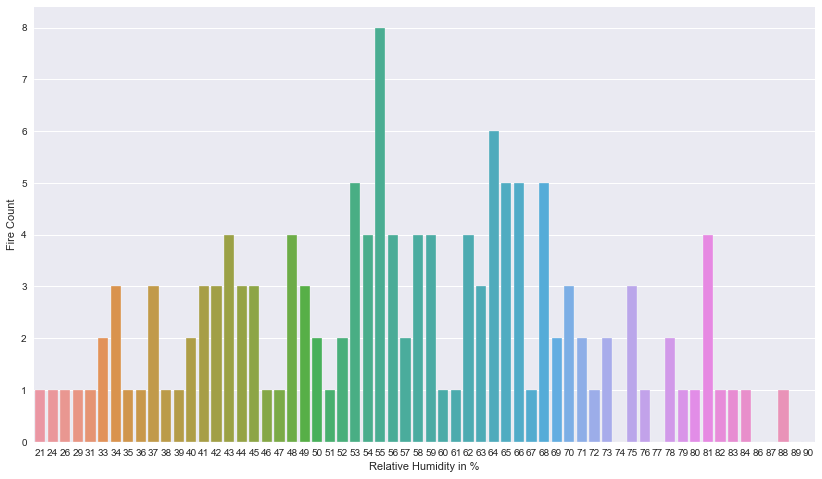

In [60]:
barchart('RH','Relative Humidity in %')

In [61]:
final_df

month  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0     Jun           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1     Jun           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2     Jun           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3     Jun           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4     Jun           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..    ...          ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
238   Sep           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
239   Sep           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
240   Sep           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
241   Sep           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
242   Sep           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

     Classes Region day_name  
0          0     BR      Fri  
1          0     BR      Sat  
2          0     BR      Sun  
3          0     BR      Mon  
4          0     BR      Tue  
..       ...    ...      ...  
238        1   SBAR      Wed  
239        0   SBAR      Thu  
240        0   SBAR      Fri  
241        0   SBAR      Sat  
242        0   SBAR      Sun  

[243 rows x 14 columns]

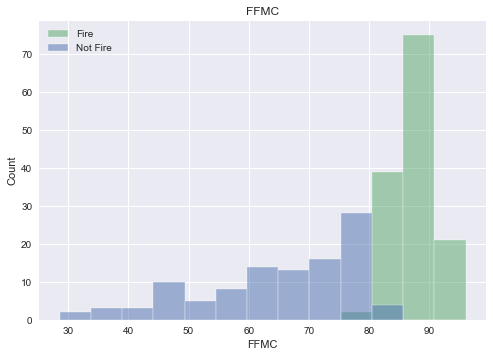

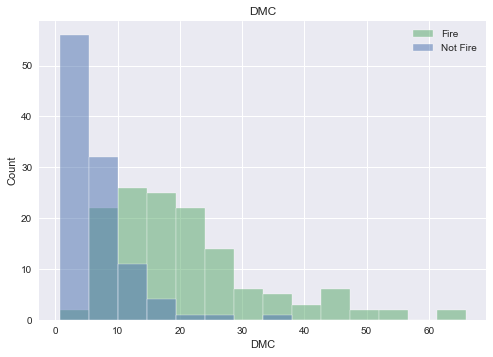

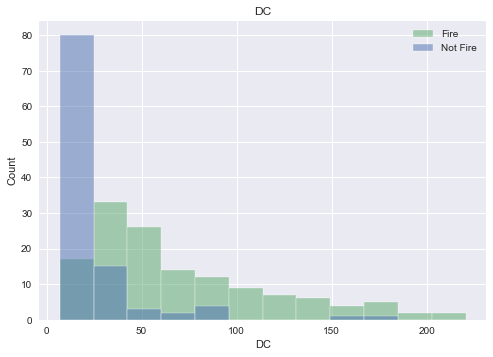

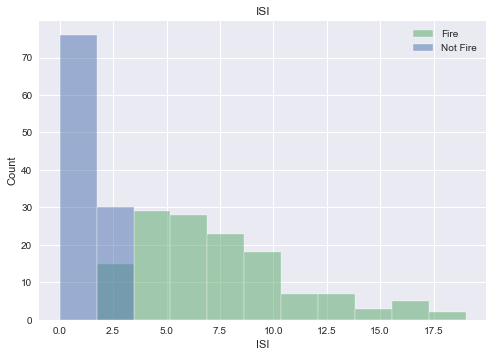

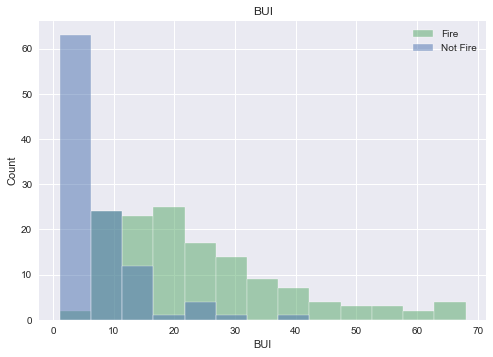

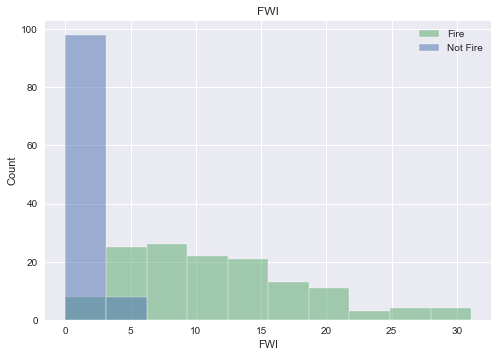

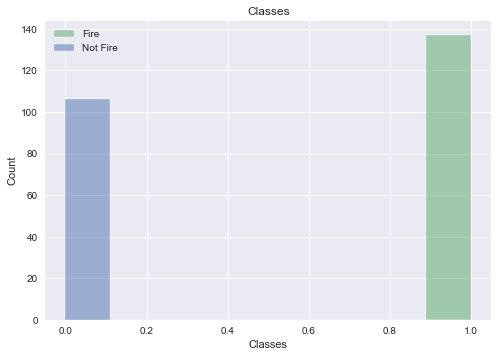

In [62]:
dftemp=final_df.drop(['Region','Temperature','Rain','Ws','month','RH','day_name'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**

#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.

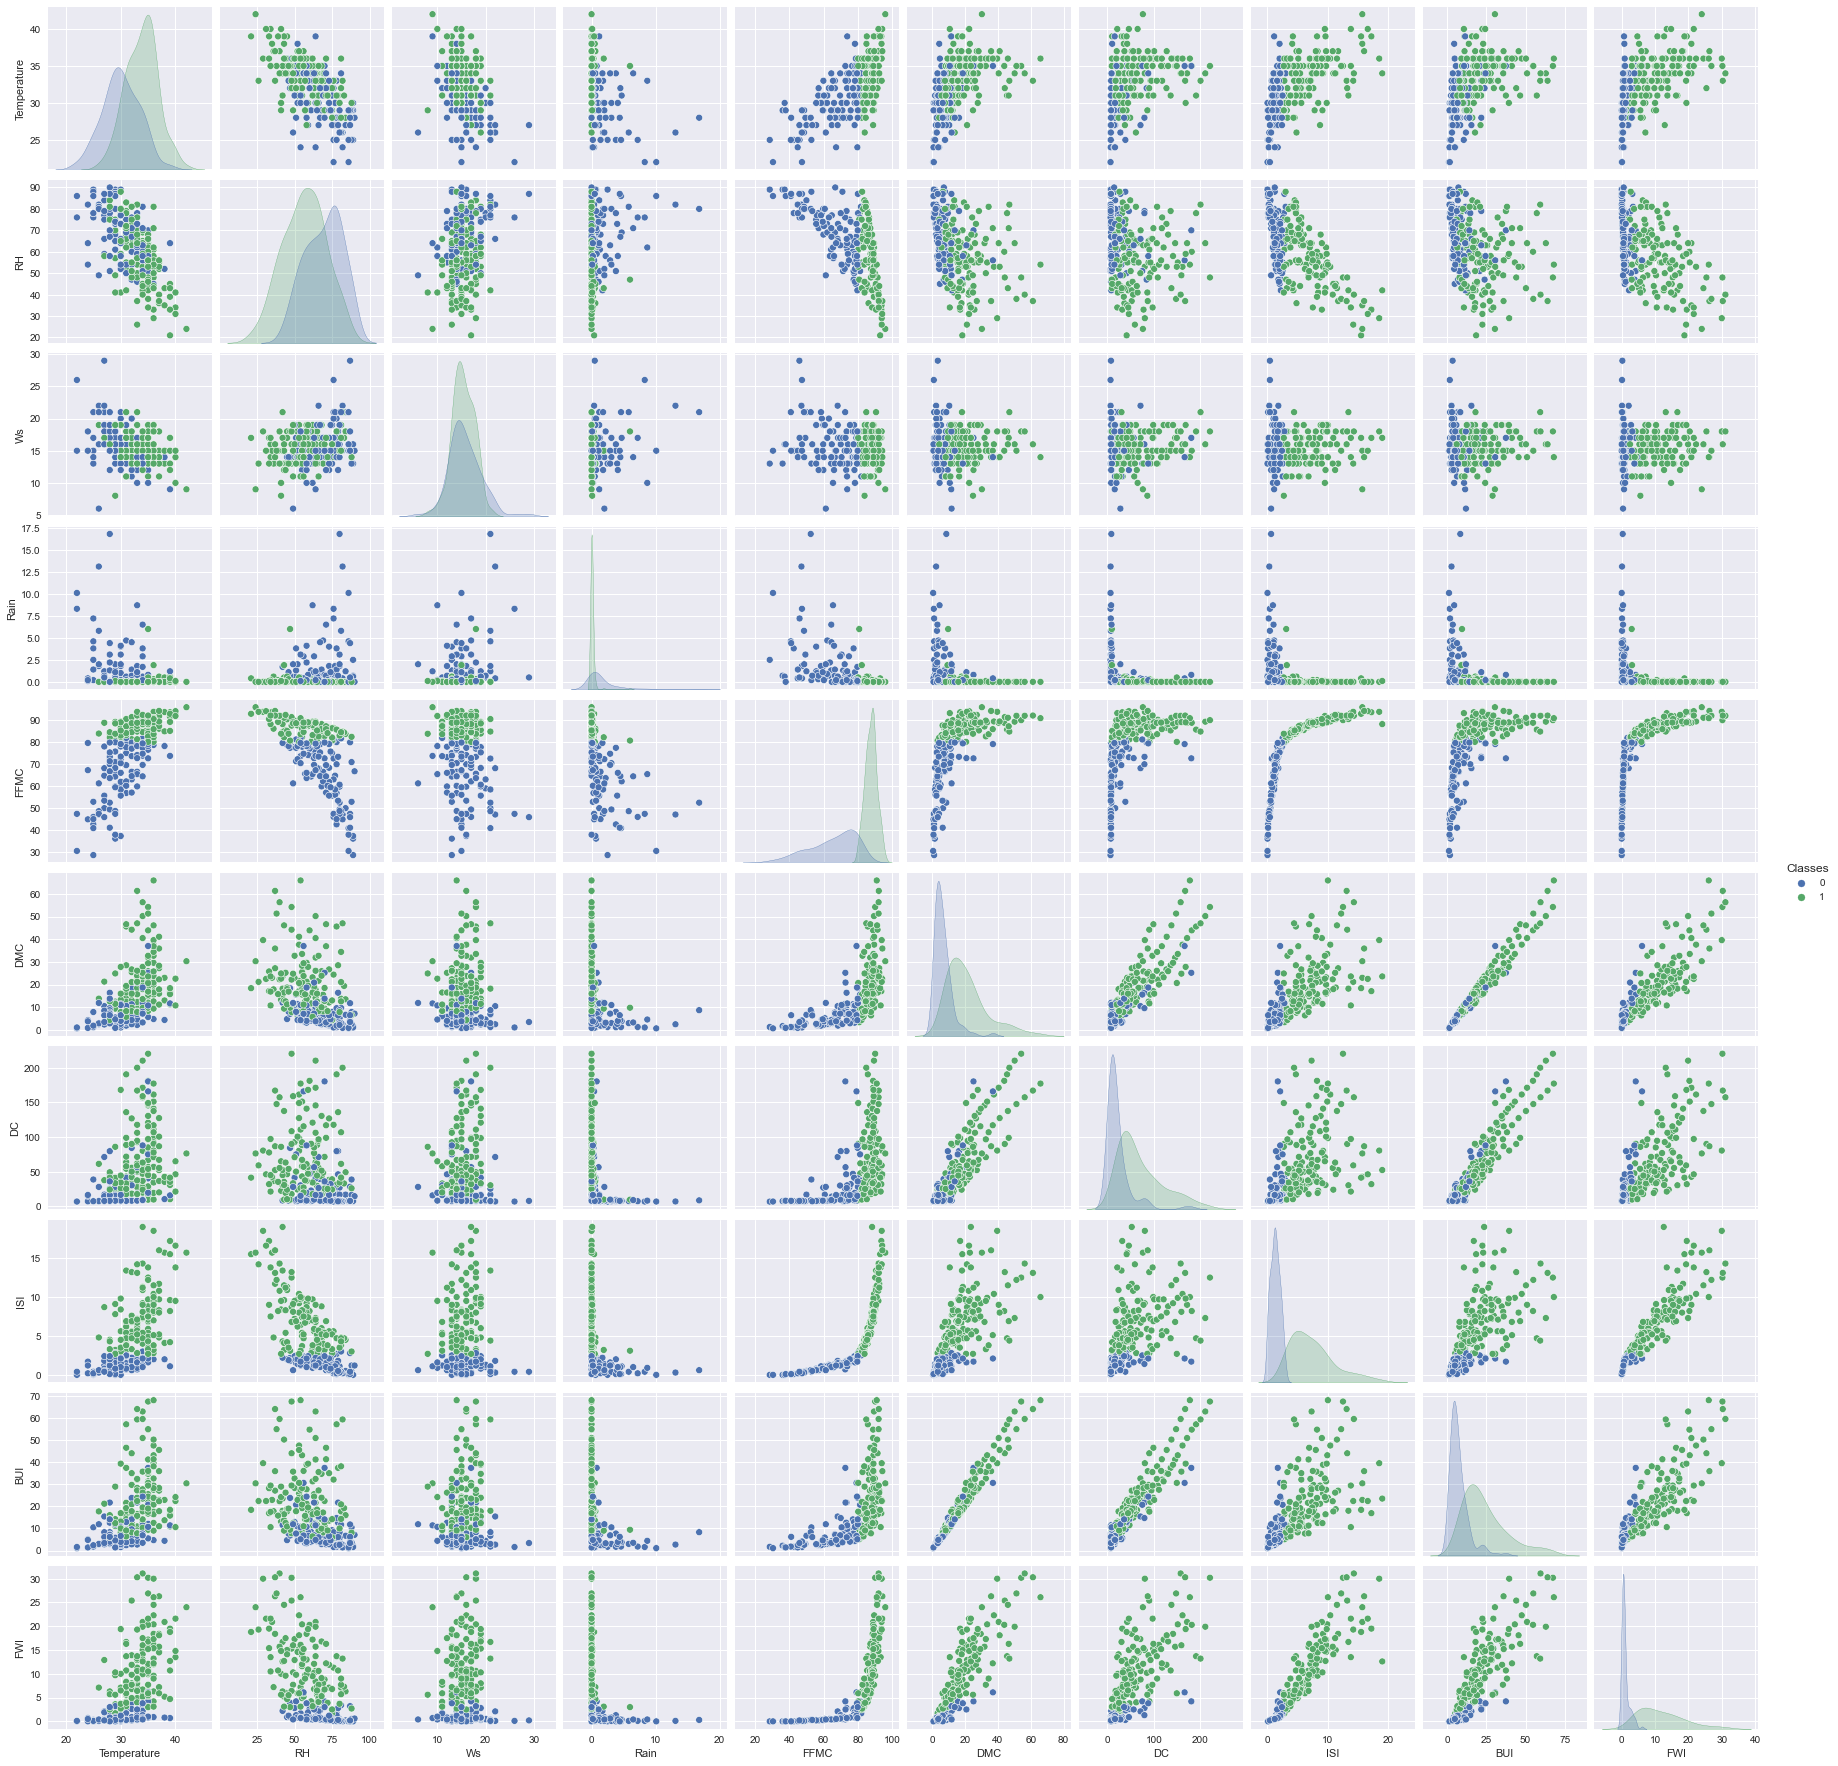

In [63]:
sns.pairplot(final_df,hue='Classes')
plt.show()

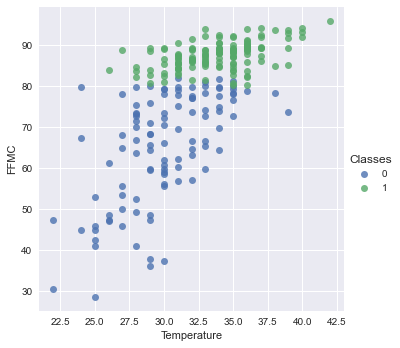

In [64]:
sns.lmplot(x='Temperature',y='FFMC',hue='Classes', data=final_df,fit_reg=False)
plt.show()

In [65]:
corr=spearmanr(data['FFMC'],data['Temperature'])
corr

SpearmanrResult(correlation=0.6655526543593834, pvalue=1.838047442028764e-32)

<b> HO:r=0 that is there is  true spearmann association between FFMC and Temperature(i.e no Association)
    H1:r!=0, that is there is an association
    
<b>Since p-value<0.05 thus reject H0,significant relation between FFMC & Temp

In [66]:
corr=spearmanr(data['RH'],data['Temperature'])
corr

SpearmanrResult(correlation=-0.6431572226877016, pvalue=9.172079759883426e-30)

<b>There lies a inverse relation between Temperature and Relative Humidity

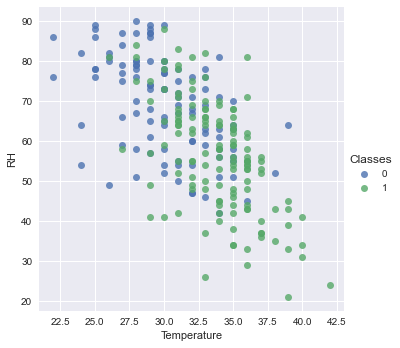

In [67]:
sns.lmplot(x='Temperature',y='RH',hue='Classes', data=final_df,fit_reg=False)
plt.show()

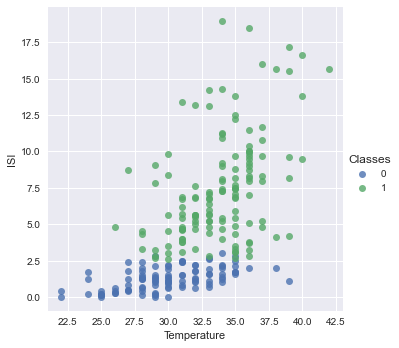

In [68]:
sns.lmplot(x='Temperature',y='ISI',hue='Classes', data=final_df,fit_reg=False)
plt.show()

In [69]:
corr=spearmanr(data['ISI'],data['Temperature'])
corr

SpearmanrResult(correlation=0.4932941166875622, pvalue=2.6277891244397673e-16)

<b>HO:r=0 that is there is true spearmann association between ISI and Temperature(i.e no Association) H1:r!=0, that is there is an association

<b>Since p-value<0.05 thus reject H0,significant relation between ISI & Temp
   
 <b> There is a moderately weak relation between the variables(ISI & Temp)

In [70]:
corr=spearmanr(data['BUI'],data['FWI'])
corr

SpearmanrResult(correlation=-0.13038274801708707, pvalue=0.04228926220235174)

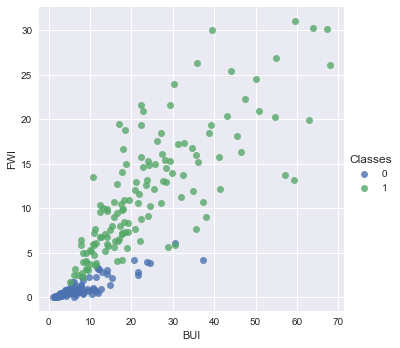

In [71]:
sns.lmplot(x='BUI',y='FWI',hue='Classes', data=final_df,fit_reg=False)
plt.show()

<b>HO:r=0 that is there is true spearmann association between BUI and FWI(i.e no Association) H1:r!=0, that is there is an association

Since p-value<0.05 thus reject H0,significant relation between FWI & BUI

There is a strong relation between the variables(FWI & BUI)

In [72]:
region = pd.crosstab(index=final_df['Classes'], columns=final_df["Region"],margins=True)
region

Region    BR  SBAR  All
Classes                
0         63    43  106
1         59    78  137
All      122   121  243

<b>Checking 2 categorical varible is to make cross tab relationship 

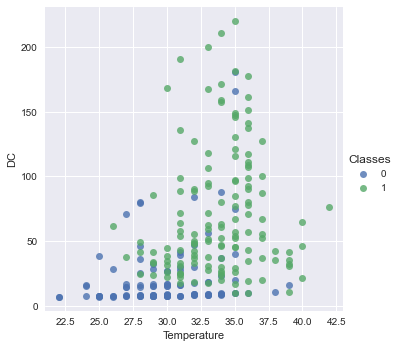

In [73]:
sns.lmplot(x='Temperature',y='DC',hue='Classes', data=final_df,fit_reg=False)
plt.show()

In [74]:
corr=spearmanr(data['DC'],data['Temperature'])
corr

SpearmanrResult(correlation=-0.15116446013187257, pvalue=0.01838183444739456)

<b>MOderately weak Relationship  as p-value <0.05, significant but weak relationship between these two variables

In [75]:
final_df.skew()

Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
Classes       -0.258846
dtype: float64

<b>BUI,FWI,DC,DMC,Rain,FFMC,ISI features have some outliers.

In [76]:
for col in ['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']:
    print(col,final_df[col].skew())

RH -0.24279045559117962
Ws 0.5555858444767362
Rain 4.5686298057295645
FFMC -1.320130116085296
DMC 1.5229829314616827
DC 1.4734602291852026
ISI 1.1402425645672238
BUI 1.4527448411320751
FWI 1.1475925108646539


### <div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>The function to detect Outlier and its removal</b><br><br><br><br></div>

In [77]:
def detect_outliers_IQR(col):
    # Finding the IQR
    percentile25 = final_df[col].quantile(0.25)
    percentile75 = final_df[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    final_df[col] = np.where(final_df[col]>upper_limit, upper_limit, np.where(final_df[col]<lower_limit,lower_limit,final_df[col]))
    return final_df[final_df[col] > upper_limit]
    

In [78]:
detect_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.45
Upper limit 27.575
Lower limit -15.425


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [79]:
detect_outliers_IQR('FFMC')

percentile25 71.85
percentile75 88.3
Upper limit 112.975
Lower limit 47.17499999999999


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [80]:
detect_outliers_IQR('DMC')

percentile25 5.8
percentile75 20.799999999999997
Upper limit 43.29999999999999
Lower limit -16.699999999999992


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [81]:
detect_outliers_IQR('BUI')

percentile25 6.0
percentile75 22.65
Upper limit 47.625
Lower limit -18.974999999999998


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [82]:
detect_outliers_IQR('Temperature')

percentile25 30.0
percentile75 35.0
Upper limit 42.5
Lower limit 22.5


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [83]:
detect_outliers_IQR('DC')

percentile25 12.35
percentile75 69.1
Upper limit 154.22499999999997
Lower limit -72.77499999999999


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [84]:
detect_outliers_IQR('Ws')

percentile25 14.0
percentile75 17.0
Upper limit 21.5
Lower limit 9.5


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [85]:
detect_outliers_IQR('Rain')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


Empty DataFrame
Columns: [month, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region, day_name]
Index: []

In [86]:
final_df.skew()

Temperature   -0.170656
RH            -0.242790
Ws             0.186602
Rain           1.241294
FFMC          -1.082654
DMC            1.091065
DC             1.184410
ISI            1.140243
BUI            1.024216
FWI            1.058205
Classes       -0.258846
dtype: float64

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>The box plot shows the removal of outliers<br><br></div>

<AxesSubplot:>

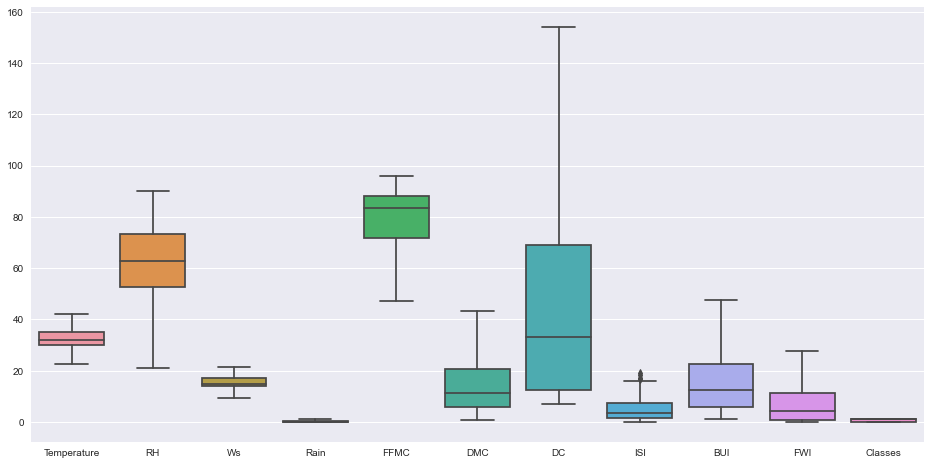

In [87]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=final_df)

# ##Outliers handled

In [88]:
final_df.head()

month  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  \
0   Jun         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5   
1   Jun         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4   
2   Jun         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1   
3   Jun         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0   
4   Jun         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5   

   Classes Region day_name  
0        0     BR      Fri  
1        0     BR      Sat  
2        0     BR      Sun  
3        0     BR      Mon  
4        0     BR      Tue

In [89]:
final_df["Classes"].value_counts()

    

1    137
0    106
Name: Classes, dtype: int64

In [90]:
final_df['Region'].value_counts()

BR      122
SBAR    121
Name: Region, dtype: int64

Design the hypothesis Null hypothesis (H0) : Two features are independent

Alternate hypothesis (H1) : Two features are dependent

If we proved that input and target variables are independent, then there is no strong relation with the target and we can remove that feature on moving forward.

Choose a alpha value We need to choose a alpha-value (significance value) which indicates how confident are we in saying two features are independent.Here we choose alpha value = 0.05 which indicates the probability of rejecting null hypothesis if it is true.

If the p value obtained is greater than alpha value the null hypotheis (H0) is true.

In [91]:
# contigency table
from sklearn.feature_selection import chi2, f_classif
alpha = 0.05
cont_table = pd.crosstab(index=final_df['Region'],columns=final_df['Classes'])
cont_table

Classes   0   1
Region         
BR       63  59
SBAR     43  78

In [92]:
from scipy.stats import chi2_contingency,chi2

# chi2 value, p value, degree of freedom , expected_table
chi2_value, p, dof, expected_table = chi2_contingency(cont_table)

print(f'chi2 value: {chi2_value}')
print(f'p value: {p}')
print(f'degree of freedom: {dof}')
print(f'expected table/array : \n {expected_table}')

chi2 value: 5.766606312654941
p value: 0.016333547311115824
degree of freedom: 1
expected table/array : 
 [[53.218107 68.781893]
 [52.781893 68.218107]]


In [93]:
## calculated value of chi2 >= crirical value from table(found using dof and alpha) --> Ho is rejected
## ie,  abs(ch2_value) > chi2.ppf(0.95, dof) -->Ho rejected

if p <= alpha:
    print(f'Reject null hypothesis. There exist some relation between features')
else:
    print(f'Accept null hypothesis. Two features are not related')

Reject null hypothesis. There exist some relation between features


Here we rejected null hypothesis which means features are not independent. There exist some relationship between.

Note: Usually in hypothesis testing values below critical value are acepted and values above it are rejected. (one tail test)

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is significant relation between Temperature with Temp of 35 or more/less and Fire

H1: There is no significant relation between Temperature with Temp of 35 or more/less and Fire
<br><br></div>

In [94]:
High_df = final_df[final_df['Temperature'] > 35 ]['Classes']
Low_df= final_df[final_df['Temperature'] < 35 ]['Classes']

In [95]:
from scipy.stats import ranksums
ranksums(High_df,Low_df)

RanksumsResult(statistic=4.886539291185731, pvalue=1.026238547049806e-06)

##### Ranksum Test

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of Temperature and Fire relatioship</b>

As per the <b>P Value - 0.0000102</b> which I got from the Ranksum Test is <b>Less than 0.05</b>, So I can Accept the Null Hypothesis.

We can say there is a significant relation  with Temperature of 35 or more/less and Fire. It is proved in the above test. <br> <br> </div>

##### Ranksum Test

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between FFMC and FIRE

H1: There is significant relation between FFMC and FIre
<br><br></div>

In [96]:
ffmc_fire1= final_df[final_df['FFMC'] > 50 ]['Classes']
ffmc_fire2= final_df[final_df['FFMC'] == 50 ]['Classes']

In [97]:
from scipy.stats import ranksums
ranksums(ffmc_fire1,ffmc_fire2)

RanksumsResult(statistic=1.0593452020470708, pvalue=0.28944259601157585)

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of FFMC and Classes (fire) relationship</b>

As per the <b>P Value = 0.28</b> which I got from the Ranksum Test is <b>greater than 0.05</b>, So I can reject the Null Hypothesis.

We can say there is a significant relation between FFMC and Fire. It is proved in the above test. <br> <br> </div>

### Ranksum Test

<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Hypothesis</b>
    
H0: There is no significant relation between DMC and FIre

H1: There is significant relation between DMC and FIre
<br><br></div>

In [98]:
N_Fire = final_df[final_df['DMC'] <30]['Classes']
Y_Fire = final_df[final_df['DMC'] >30]['Classes']

In [99]:
from scipy.stats import ranksums
ranksums(N_Fire,Y_Fire)

RanksumsResult(statistic=-3.6152934415717874, pvalue=0.000300007603319904)

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><b>Conclusion of DMC and FIRE </b>
    
As per the <b>P Value = 0.0003</b> which I got from the Ranksum Test is <b>LEss than 0.05</b>, So accept the Null Hypothesis.

It isproved in the above test that with less than 30 DMC there is no chances of Fire. <br> <br> </div>


### To prove the above test confirms by the chi-square   

In [100]:
chi2_contingency = pd.crosstab(index = final_df['Classes'],columns=final_df['DMC'], margins= True)
chi2_contingency

DMC      0.7  0.9  1.1  1.2  1.3  1.7  1.9  2.1  2.2  2.4  ...  34.4  35.9  \
Classes                                                    ...               
0          1    2    2    1    3    1    4    1    2    1  ...     0     0   
1          0    0    0    0    0    0    0    0    0    0  ...     1     1   
All        1    2    2    1    3    1    4    1    2    1  ...     1     1   

DMC      36.9  37.0  37.6  39.6  40.5  41.1  43.29999999999999  All  
Classes                                                              
0           0     1     0     0     0     0                  0  106  
1           1     0     1     1     1     1                 12  137  
All         1     1     1     1     1     1                 12  243  

[3 rows x 155 columns]

In [101]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(index=final_df['Classes'], columns=final_df["DMC"]))

(204.91348987742737,
 0.0032332741323552777,
 153,
 array([[0.43621399, 0.87242798, 0.87242798, 0.43621399, 1.30864198,
         0.43621399, 1.74485597, 0.43621399, 0.87242798, 0.43621399,
         1.30864198, 1.30864198, 0.43621399, 0.87242798, 1.30864198,
         1.30864198, 0.43621399, 1.30864198, 0.43621399, 0.43621399,
         0.87242798, 0.43621399, 0.43621399, 0.87242798, 0.43621399,
         0.43621399, 1.30864198, 0.43621399, 1.30864198, 0.43621399,
         0.43621399, 0.87242798, 0.43621399, 0.43621399, 1.30864198,
         1.30864198, 0.43621399, 0.87242798, 0.87242798, 0.43621399,
         0.43621399, 1.30864198, 0.87242798, 0.87242798, 0.43621399,
         0.87242798, 0.43621399, 2.18106996, 0.43621399, 0.87242798,
         0.87242798, 1.30864198, 0.43621399, 0.43621399, 0.43621399,
         0.87242798, 0.43621399, 0.43621399, 1.30864198, 0.87242798,
         0.87242798, 0.43621399, 0.43621399, 0.43621399, 0.87242798,
         0.43621399, 0.43621399, 0.43621399, 0.87242

<div style="color:#102547; background-color:powderblue; padding-left: 12px !important;"><br><br><b>Conclusion of DMC and Fire relationship</b><br><br>pvalue = 0.003 < 0.05 there is no relation between Fire and DMC with value <30<br><br></div>

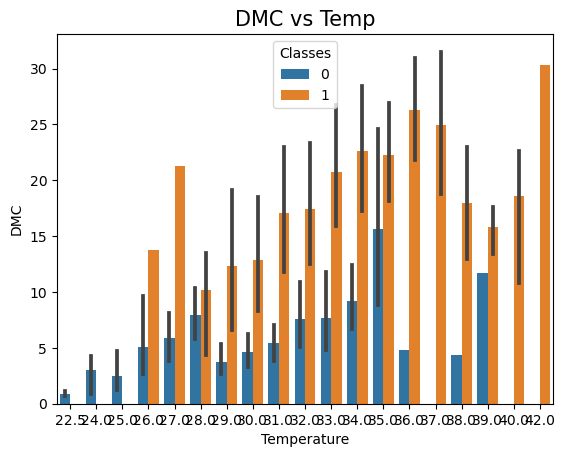

In [102]:
plt.style.use("default")
sns.barplot(x = final_df['Temperature'], y = final_df['DMC'],hue='Classes', data = final_df)
plt.title('DMC vs Temp', fontsize = 15)
plt.show()

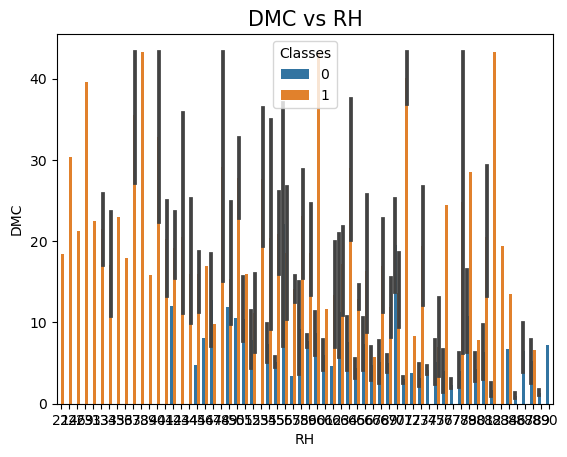

In [103]:
plt.style.use("default")

sns.barplot(x = final_df['RH'], y = final_df['DMC'],hue='Classes', data = final_df)
plt.title('DMC vs RH', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

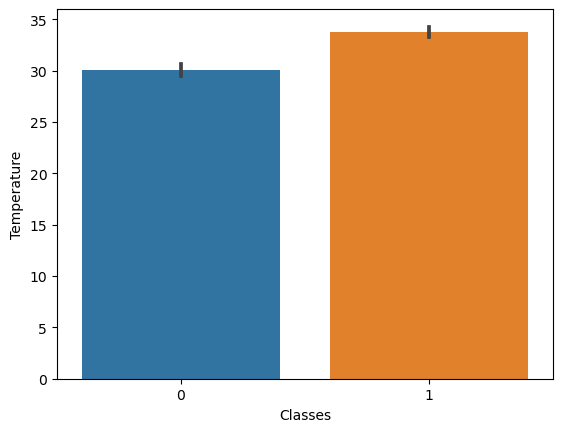

In [104]:
sns.barplot(x = 'Classes',y = 'Temperature', data = final_df)

<AxesSubplot:xlabel='Classes', ylabel='RH'>

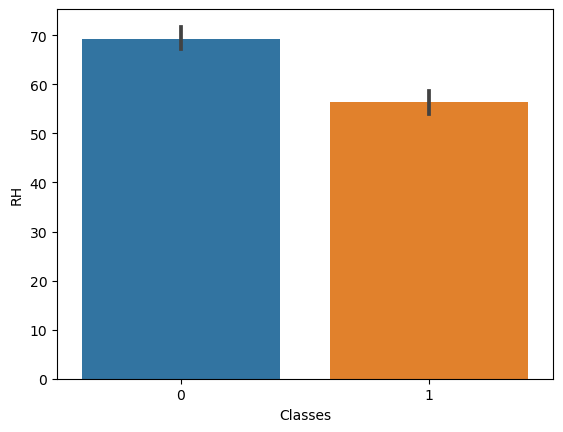

In [105]:
sns.barplot(x = 'Classes',y = 'RH', data = final_df)

<AxesSubplot:xlabel='Classes', ylabel='DMC'>

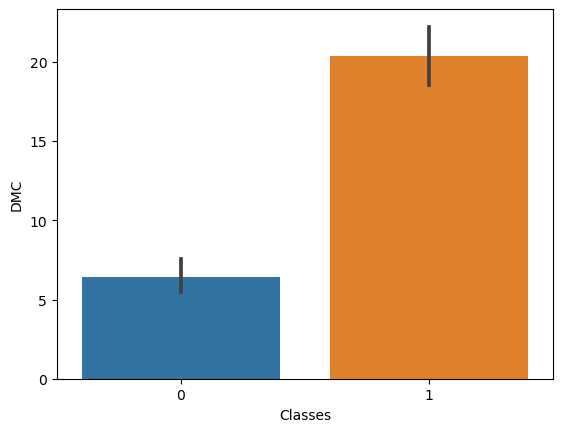

In [106]:
sns.barplot(x = 'Classes',y = 'DMC', data = final_df)

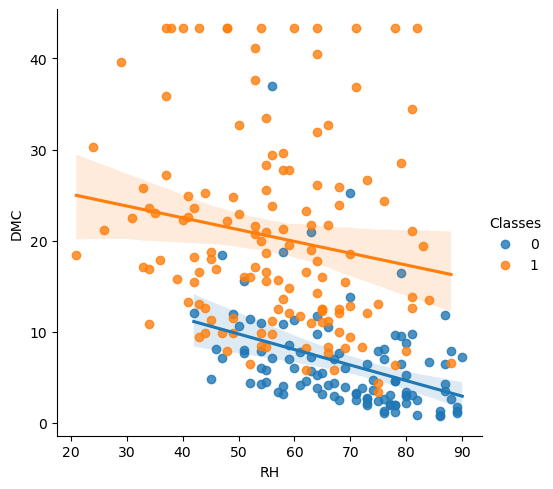

In [107]:
sns.lmplot(x = 'RH',y = 'DMC', data = final_df,hue='Classes')

<b> we can see that as the DMC value is high than RH 

<AxesSubplot:xlabel='Classes', ylabel='Ws'>

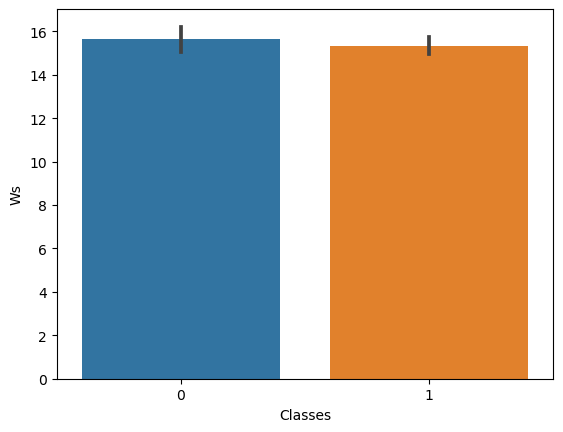

In [108]:
sns.barplot(x = 'Classes',y = 'Ws', data = final_df)

In [159]:
X=final_df.iloc[:,1:-3]
X=sm.add_constant(X)
y=final_df[['Classes']]
model_slr=sm.OLS(y,X).fit()
#fitted values
model_fitted_vals = model_slr.fittedvalues
#model residuals
model_residuals = model_slr.resid
#standardised residuals
model_norm_residuals = model_slr.get_influence().resid_studentized_internal

In [160]:
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Classes   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     61.38
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.57e-59
Time:                        13:50:56   Log-Likelihood:                -17.209
No. Observations:                 243   AIC:                             56.42
Df Residuals:                     232   BIC:                             94.84
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2732      0.406     -5.598      0.000      -3.073      -1.473
Temperature    -0.0043      0.007     -0.580      0.563      -0.019       0.010
RH              0.0110      0.002      5.151      0.000       0.007       0.015
Ws             -0.0104      0.008     -1.363      0.174      -0.025       0.005
Rain            0.1196      0.068      1.753      0.081      -0.015       0.254
FFMC            0.0283      0.003      8.317      0.000       0.022       0.035
DMC            -0.0205      0.012     -1.668      0.097      -0.045       0.004
DC             -0.0011      0.002     -0.585      0.559      -0.005       0.003
ISI             0.0226      0.019      1.197      0.232      -0.015       0.060
BUI             0.0144      0.016      0.898      0.370      -0.017       0.046
FWI             0.0295      0.014      2.157      0.032       0.003       0.057
==============================================================================
Omnibus:                        0.947   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                1.062
Skew:                          -0.120   Prob(JB):                        0.588
Kurtosis:                       2.782   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
X

const  Temperature  RH    Ws  Rain    FFMC   DMC    DC  ISI   BUI  FWI
0      1.0         29.0  57  18.0  0.00  65.700   3.4   7.6  1.3   3.4  0.5
1      1.0         29.0  61  13.0  1.25  64.400   4.1   7.6  1.0   3.9  0.4
2      1.0         26.0  82  21.5  1.25  47.175   2.5   7.1  0.3   2.7  0.1
3      1.0         25.0  89  13.0  1.25  47.175   1.3   6.9  0.0   1.7  0.0
4      1.0         27.0  77  16.0  0.00  64.800   3.0  14.2  1.2   3.9  0.5
..     ...          ...  ..   ...   ...     ...   ...   ...  ...   ...  ...
238    1.0         30.0  65  14.0  0.00  85.400  16.0  44.5  4.5  16.9  6.5
239    1.0         28.0  87  15.0  1.25  47.175   6.5   8.0  0.1   6.2  0.0
240    1.0         27.0  87  21.5  0.50  47.175   3.5   7.9  0.4   3.4  0.2
241    1.0         24.0  54  18.0  0.10  79.700   4.3  15.2  1.7   5.1  0.7
242    1.0         24.0  64  15.0  0.20  67.300   3.8  16.5  1.2   4.8  0.5

[243 rows x 11 columns]

In [162]:
y

Classes
0          0
1          0
2          0
3          0
4          0
..       ...
238        1
239        0
240        0
241        0
242        0

[243 rows x 1 columns]

In [163]:
X.iloc[:,1:10].corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651974 -0.279448 -0.336690  0.679492  0.515620   
RH             -0.651974  1.000000  0.228661  0.213343 -0.646303 -0.421480   
Ws             -0.279448  0.228661  1.000000  0.051084 -0.157332  0.012481   
Rain           -0.336690  0.213343  0.051084  1.000000 -0.733296 -0.457797   
FFMC            0.679492 -0.646303 -0.157332 -0.733296  1.000000  0.650241   
DMC             0.515620 -0.421480  0.012481 -0.457797  0.650241  1.000000   
DC              0.394659 -0.247913  0.091964 -0.463012  0.545340  0.878941   
ISI             0.604508 -0.686667  0.025596 -0.550684  0.762859  0.698495   
BUI             0.490208 -0.374245  0.042857 -0.476781  0.641254  0.982068   

                   DC       ISI       BUI  
Temperature  0.394659  0.604508  0.490208  
RH          -0.247913 -0.686667 -0.374245  
Ws           0.091964  0.025596  0.042857  
Rain        -0.463012 -0.550684 -0.476781  
FFMC         0.545340  0.762859  0.641254  
DMC          0.878941  0.698495  0.982068  
DC           1.000000  0.530377  0.942710  
ISI          0.530377  1.000000  0.667141  
BUI          0.942710  0.667141  1.000000

<b>Now based on P-value, it should be smaller than 0.05, we will drop some values who will be having greater P-value
In correlation map, we can see, that DMC is having 0.98 % correlation with BUI. So, we can drop one column. BUI is having a P-value of 0.370 and DMC(Duff Moisture) is having a P-value of 0.097. So, BUI(Build up index taken from FWI) can be dropped.

In [164]:
X = X.drop(labels = "BUI", axis = 1)

In [165]:
X

const  Temperature  RH    Ws  Rain    FFMC   DMC    DC  ISI  FWI
0      1.0         29.0  57  18.0  0.00  65.700   3.4   7.6  1.3  0.5
1      1.0         29.0  61  13.0  1.25  64.400   4.1   7.6  1.0  0.4
2      1.0         26.0  82  21.5  1.25  47.175   2.5   7.1  0.3  0.1
3      1.0         25.0  89  13.0  1.25  47.175   1.3   6.9  0.0  0.0
4      1.0         27.0  77  16.0  0.00  64.800   3.0  14.2  1.2  0.5
..     ...          ...  ..   ...   ...     ...   ...   ...  ...  ...
238    1.0         30.0  65  14.0  0.00  85.400  16.0  44.5  4.5  6.5
239    1.0         28.0  87  15.0  1.25  47.175   6.5   8.0  0.1  0.0
240    1.0         27.0  87  21.5  0.50  47.175   3.5   7.9  0.4  0.2
241    1.0         24.0  54  18.0  0.10  79.700   4.3  15.2  1.7  0.7
242    1.0         24.0  64  15.0  0.20  67.300   3.8  16.5  1.2  0.5

[243 rows x 10 columns]

<b> So to know the predictors we have used Multiple OLS and minimise the square of errors

In [177]:
X=final_df[['RH','Ws','Rain','FFMC','DMC','FWI','Classes']]
y=final_df[['Temperature']]
X=sm.add_constant(X)
import statsmodels.api as sm
model_full_mlr = sm.OLS(y, X).fit()
model_full_mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     47.14
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.12e-41
Time:                        14:22:09   Log-Likelihood:                -550.11
No. Observations:                 243   AIC:                             1116.
Df Residuals:                     235   BIC:                             1144.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6921      3.419      7.515      0.000      18.957      32.428
RH            -0.0489      0.019     -2.592      0.010      -0.086      -0.012
Ws            -0.2327      0.064     -3.623      0.000      -0.359      -0.106
Rain           1.6221      0.586      2.770      0.006       0.468       2.776
FFMC           0.1534      0.032      4.799      0.000       0.090       0.216
DMC            0.0179      0.032      0.566      0.572      -0.044       0.080
FWI            0.0738      0.061      1.209      0.228      -0.046       0.194
Classes       -0.3131      0.582     -0.538      0.591      -1.459       0.833
==============================================================================
Omnibus:                        5.898   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.695
Skew:                          -0.370   Prob(JB):                       0.0580
Kurtosis:                       3.123   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Adjrsquare is  .993.So all features can used as Predictors. 

In [178]:
#fitted values
model_fitted_vals = model_full_mlr.fittedvalues
#model residuals
model_residuals = model_full_mlr.resid

In [179]:
#standardised residuals
model_norm_residuals = model_full_mlr.get_influence().resid_studentized_internal


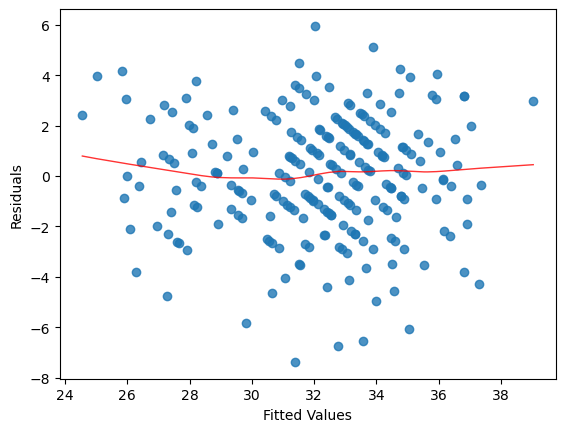

In [180]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

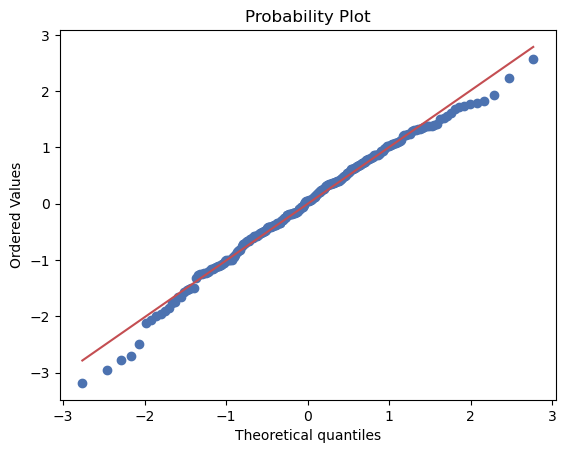

In [181]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [182]:
np.sqrt(model_full_mlr.scale)

2.3670060588701722

<b>y= -2.1354+0.0599RH -0.1353Ws+4.7476 Rain+0.3783FFMC-0.0592 DMC +0.2103FWI-20.1354 Classes+e

<b>-2.1354 is the est intercept, average y when all x are 0

<b>for every 1% increase in RH, the average increase in FIre will be 0.0599,keeping all other variables the same
    
<b>for every 1 km/hr increase in Ws, the expected decrease in fire is 0.1353,keeping all other variables the same
    
<b>for every 1 mm increase in Rain, the expected increase in Fire is 4.7476,keeping all other variables constant
    
<b>so going from a Region BR cat to a SBR cat, the expected decrease in Classes(Fire/No Fire) is 2.1354 keeping all variables the same
    
<b>H0: b_i (true partial slope for each term) = 0
    
<b>Since RH,Rain,FFMC,FWI p-values <0.05, except for DMC & Ws so we have significant relationships between these variables with the temperature.
                                       
<b>58% variantion in TEmperature is being explained by this model which is doing a relatively good
    
<b>2.3670060588701722 is RSE, the average spread of residuals around eq
    
<b>Looking at adjusted R_sq, the  mlr has the highest value.


<div style="background-color:#e8ca66; padding-left: 12px !important;"><br><b>Logistic Regression</b><br><br>
As previously mentioned, my response variable is Classes . <i>My research Question is what Influences the chances of Fire/No Fire</i>
<br><br>

In [151]:
from statsmodels.formula.api import logit
logit_model=logit('Classes ~ Temperature+RH+FFMC+DMC+FWI+C(Region)',final_df).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.014235
         Iterations 20


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.979     
Dependent Variable:   Classes           AIC:               20.9181   
Date:                 2022-08-29 13:46  BIC:               45.3695   
No. Observations:     243               Log-Likelihood:    -3.4590   
Df Model:             6                 LL-Null:           -166.45   
Df Residuals:         236               LLR p-value:       2.1963e-67
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       20.0000                                        
---------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------
Intercept         -71.1528 270.5821 -0.2630 0.7926 -601.4839 459.1783
C(Region)[T.SBAR]   3.8180   3.1689  1.2048 0.2283   -2.3929  10.0290
Temperature        -3.4640   4.3448 -0.7973 0.4253  -11.9797   5.0516
RH                 -0.4308   0.5273 -0.8171 0.4139   -1.4642   0.6026
FFMC                2.2211   2.7198  0.8166 0.4141   -3.1096   7.5518
DMC                -5.6865   6.8444 -0.8308 0.4061  -19.1014   7.7284
FWI                28.7630  35.6563  0.8067 0.4199  -41.1222  98.6481
=====================================================================

"""

## <b>To predict probability of Fire/No Fire<b>

<i>pi here is probability of Fire

logit(pi)=log(success odd of Fire) = log (pi/(1-pi)) = -71.1528 + 3.8180 SBAR_region - 0.3.4640 Temperature - 0.4308 RH + 2.2241 FFMC - 5.6865 DMC + 28.7630 FWI

Intercept - everything else is zero Probability of success

In [ ]:
np.exp(-71.1528)

Estimated success odds for Fire 1.255253925025695e-31 in with All the variables zero

In [ ]:
np.exp( 3.8180)

Estimated success odds for Fire change by factor of 45.51309105184846 when you change Region to winter with 0 everything

In [ ]:
np.exp( -3.4640)

Estimated success odds for Fire change by factor of 0.03130429407347458 when change in Temperature change by 1 Unit in with evrything else

In [ ]:
np.exp( -0.4308)

Estimated success odds for Fire change by factor of 0.6499888955549492 when change in Relative Humidity change by 1 Unit in with evrything else zero

In [ ]:
np.exp( 2.2211)

Estimated success odds for Fire change by factor of 9.217464502312948 when change in FFMC change by 1 unit everything else is zero

In [ ]:
np.exp(-5.6865)

Estimated success odds for Fire change by factor of 0.003391442268947625 when change in DMC change by 1 unit everything else is zero

In [ ]:
np.exp(28.7630)

Estimated success odds for Fire change by factor of 3101788510731.4873 when change in FWI change by 1 unit everything else is zero